In [120]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib
import statistics
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import math
import glob
from itertools import combinations
from matplotlib import pyplot as plt
from Bio import Phylo
import biotite
from pca_plot import *

In [121]:
## Read and merge files 
anotation = pd.read_csv('/branchinecta/jbazanwilliamson/SGDP_anotation.csv', sep=',', encoding='latin-1')

ids_hg19 = pd.DataFrame()
ids_hg19['SAMPLE'] = anotation['3-Illumina_ID']
ids_hg19['REGION'] = anotation['10-Region']


In [122]:
####Results from chm13_data_gene_regions.py  
## Output is called in the next cell

In [168]:
chm13 = pd.read_csv('../data/chm13_gene_regions.csv', index_col=0)
chm13['LENGHT'] = chm13['END'] - chm13['START']
chm13 = chm13.drop(columns=['START_GENE', 'END_GENE'])
chm13 = chm13.drop_duplicates()
chm13


/opt/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


SAMPLE CHR     START       END  SCORE         TYPE  \
0        LP6005441-DNA_B02   X    105118    116978      1     DELETION   
21       LP6005441-DNA_B02   X    280336    290793      1     DELETION   
23       LP6005441-DNA_B02   X   1038532   1048096      1     DELETION   
29       LP6005441-DNA_B02   X   1193541   1202443      1     DELETION   
52       LP6005441-DNA_B02   X   1296349   1304923      1     DELETION   
...                    ...  ..       ...       ...    ...          ...   
8491177  LP6005442-DNA_H01   Y  24560626  24571241     32  DUPLICATION   
8491179  LP6005442-DNA_H01   Y  27448383  62025943      5  DUPLICATION   
8496043  LP6005442-DNA_H01   Y  62058889  62091387     18  DUPLICATION   
8496045  LP6005442-DNA_H01   Y  62227677  62253121      4  DUPLICATION   
8496049  LP6005442-DNA_H01   Y  62451825  62460029     25  DUPLICATION   

           LENGHT  
0           11860  
21          10457  
23           9564  
29           8902  
52           8574  
...           ...  
8491177     10615  
8491179  34577560  
8496043     32498  
8496045     25444  
8496049      8204  

[1117819 rows x 7 columns]

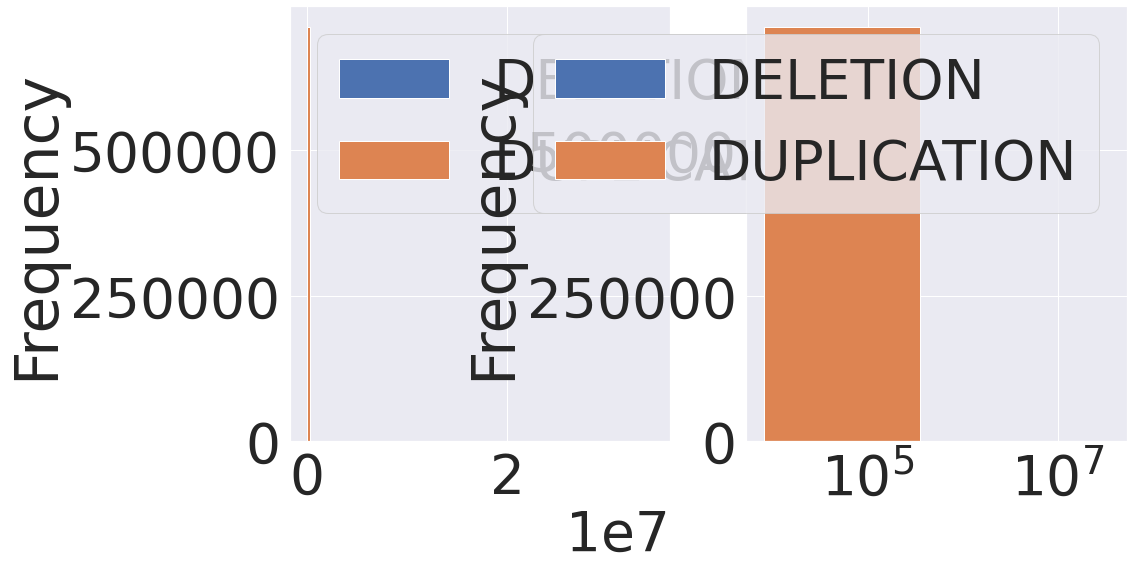

In [169]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

df_plot= chm13.groupby(['TYPE'])['LENGHT']

df_plot.plot(kind='hist',stacked=True, bins=100, legend=True, ax=axs[0]) # alpha for transparency

plt.xscale('log')
#plt.show()

df_plot = chm13.groupby(['TYPE'])['LENGHT']

df_plot.plot(kind='hist',stacked=True, bins=100, legend=True, ax=axs[1]) # alpha for transparency

plt.show()

In [170]:
#subsetting deletions and duplications
deletions = chm13[chm13['TYPE'] =='DELETION']
duplications = chm13[chm13['TYPE'] == 'DUPLICATION']

In [195]:
#change to df when using telomeres and centromeres filtration
final_cnv = deletions.pivot_table(index=["CHR", "START", "END"], 
                    columns='SAMPLE', 
                    values='SCORE').reset_index()


final_cnv = final_cnv.dropna(thresh=30)
final_cnv

SAMPLE CHR     START       END  LP6005441-DNA_A01  LP6005441-DNA_A03  \
0        1    521722    540598                NaN                NaN   
2        1   1041679   1050074                NaN                NaN   
3        1   1199726   1209870                NaN                NaN   
4        1   1382671   1391067                NaN                NaN   
9        1   2086549   2277495                NaN                NaN   
...     ..       ...       ...                ...                ...   
13096    Y  25849672  25870481                NaN                0.0   
13097    Y  26436587  26458551                NaN                0.0   
13098    Y  26778516  26788355                NaN                0.0   
13099    Y  26824629  26832713                NaN                0.0   
13100    Y  26885127  26896176                NaN                0.0   

SAMPLE  LP6005441-DNA_A04  LP6005441-DNA_A05  LP6005441-DNA_A06  \
0                     NaN                NaN                NaN   
2                     1.0                1.0                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
9                     NaN                NaN                NaN   
...                   ...                ...                ...   
13096                 0.0                NaN                NaN   
13097                 0.0                NaN                NaN   
13098                 0.0                NaN                NaN   
13099                 0.0                NaN                NaN   
13100                 0.0                NaN                NaN   

SAMPLE  LP6005441-DNA_A08  LP6005441-DNA_A09  ...  LP6005677-DNA_D03  \
0                     NaN                NaN  ...                1.0   
2                     1.0                NaN  ...                1.0   
3                     NaN                NaN  ...                NaN   
4                     NaN                NaN  ...                NaN   
9                     NaN                1.0  ...                NaN   
...                   ...                ...  ...                ...   
13096                 NaN                1.0  ...                0.0   
13097                 NaN                NaN  ...                0.0   
13098                 NaN                NaN  ...                0.0   
13099                 NaN                NaN  ...                0.0   
13100                 NaN                NaN  ...                0.0   

SAMPLE  LP6005677-DNA_E01  LP6005677-DNA_F01  LP6005677-DNA_G01  \
0                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                1.0                NaN   
9                     NaN                NaN                NaN   
...                   ...                ...                ...   
13096                 NaN                0.0                NaN   
13097                 NaN                0.0                NaN   
13098                 NaN                0.0                NaN   
13099                 NaN                0.0                NaN   
13100                 NaN                0.0                NaN   

SAMPLE  LP6007068-DNA_A01  LP6007069-DNA_A01  SS6004471  SS6004477  SS6004478  \
0                     NaN                NaN        1.0        NaN        1.0   
2                     1.0                1.0        1.0        NaN        NaN   
3                     NaN                NaN        1.0        1.0        NaN   
4                     NaN                NaN        NaN        NaN        NaN   
9                     1.0                1.0        1.0        1.0        1.0   
...                   ...                ...        ...        ...        ...   
13096                 NaN                1.0        NaN        NaN        1.0   
13097       

In [196]:
from scipy import stats
#final_cnv = final_cnv.iloc[new]
final = final_cnv.iloc[:,3:284]
counts = final
counts = counts.fillna(2)

#counts = counts[counts.columns.intersection(counts_a.columns)]

#counts = counts.drop(columns=['LP6005592-DNA_G03',
#                     'LP6005443-DNA_E10',
#                     'LP6005442-DNA_E04'])

counts = counts.T
counts = counts.sort_index()
counts

0      2      3      4      9      26     35     36     \
SAMPLE                                                                      
LP6005441-DNA_A01    2.0    2.0    2.0    2.0    2.0    1.0    2.0    1.0   
LP6005441-DNA_A03    2.0    2.0    2.0    2.0    2.0    2.0    1.0    2.0   
LP6005441-DNA_A04    2.0    1.0    2.0    2.0    2.0    2.0    2.0    2.0   
LP6005441-DNA_A05    2.0    1.0    2.0    2.0    2.0    2.0    2.0    1.0   
LP6005441-DNA_A06    2.0    2.0    2.0    2.0    2.0    2.0    2.0    2.0   
...                  ...    ...    ...    ...    ...    ...    ...    ...   
LP6007069-DNA_A01    2.0    1.0    2.0    2.0    1.0    2.0    2.0    2.0   
SS6004471            1.0    1.0    1.0    2.0    1.0    1.0    2.0    2.0   
SS6004477            2.0    2.0    1.0    2.0    1.0    1.0    2.0    2.0   
SS6004478            1.0    2.0    2.0    2.0    1.0    1.0    1.0    2.0   
SS6004480            1.0    2.0    2.0    2.0    1.0    1.0    2.0    2.0   

                   37     40     ...  13091  13092  13093  13094  13095  \
SAMPLE                           ...                                      
LP6005441-DNA_A01    2.0    1.0  ...    2.0    2.0    2.0    2.0    2.0   
LP6005441-DNA_A03    2.0    2.0  ...    0.0    1.0    0.0    0.0    0.0   
LP6005441-DNA_A04    2.0    2.0  ...    0.0    1.0    0.0    0.0    0.0   
LP6005441-DNA_A05    2.0    2.0  ...    2.0    2.0    2.0    2.0    2.0   
LP6005441-DNA_A06    2.0    2.0  ...    2.0    2.0    2.0    2.0    2.0   
...                  ...    ...  ...    ...    ...    ...    ...    ...   
LP6007069-DNA_A01    2.0    2.0  ...    0.0    2.0    0.0    0.0    0.0   
SS6004471            2.0    1.0  ...    2.0    2.0    2.0    2.0    2.0   
SS6004477            1.0    2.0  ...    2.0    2.0    2.0    2.0    2.0   
SS6004478            2.0    2.0  ...    0.0    2.0    0.0    0.0    0.0   
SS6004480            2.0    1.0  ...    2.0    2.0    2.0    2.0    2.0   

                   13096  13097  13098  13099  13100  
SAMPLE                                                
LP6005441-DNA_A01    2.0    2.0    2.0    2.0    2.0  
LP6005441-DNA_A03    0.0    0.0    0.0    0.0    0.0  
LP6005441-DNA_A04    0.0    0.0    0.0    0.0    0.0  
LP6005441-DNA_A05    2.0    2.0    2.0    2.0    2.0  
LP6005441-DNA_A06    2.0    2.0    2.0    2.0    2.0  
...                  ...    ...    ...    ...    ...  
LP6007069-DNA_A01    1.0    0.0    0.0    0.0    0.0  
SS6004471            2.0    2.0    2.0    2.0    2.0  
SS6004477            2.0    2.0    2.0    2.0    2.0  
SS6004478            1.0    0.0    0.0    0.0    0.0  
SS6004480            2.0    2.0    2.0    2.0    2.0  

[269 rows x 2922 columns]

In [197]:
features = ids_hg19.set_index('SAMPLE').merge(counts, left_index=True, right_index=True)
features = features.loc[:,['REGION',]]
features = features.sort_index()
features 

REGION
SAMPLE                        
LP6005441-DNA_A01  WestEurasia
LP6005441-DNA_A03      Oceania
LP6005441-DNA_A04      America
LP6005441-DNA_A05  WestEurasia
LP6005441-DNA_A06  WestEurasia
...                        ...
LP6007069-DNA_A01  WestEurasia
SS6004471               Africa
SS6004477              Oceania
SS6004478              Oceania
SS6004480               Africa

[269 rows x 1 columns]

In [198]:
#PCA
pca = PCA(n_components=10)
pca_results = pca.fit_transform(counts)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3', 'component_4',
                                  'component_5',
                                  'component_6',
                                  'component_7',
                                  'component_8',
                                  'component_9',
                                   'component_10'
                                  ],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)
df_pca

REGION  component_1  component_2  component_3  \
SAMPLE                                                                  
LP6005441-DNA_A01  WestEurasia   -13.603909    -2.254474     0.662504   
LP6005441-DNA_A03      Oceania    22.464571     1.271665     1.612569   
LP6005441-DNA_A04      America    22.501814    -3.283492     0.168199   
LP6005441-DNA_A05  WestEurasia   -13.679740    -5.718832    -1.689049   
LP6005441-DNA_A06  WestEurasia   -13.658295    -6.127303    -0.109407   
...                        ...          ...          ...          ...   
LP6007069-DNA_A01  WestEurasia    20.095955     5.552945    -1.454636   
SS6004471               Africa   -13.594652     3.868068     3.318004   
SS6004477              Oceania   -13.702814     6.327093     3.900804   
SS6004478              Oceania    21.416697     4.595865     1.795734   
SS6004480               Africa   -13.582556     1.105450    -2.001402   

                   component_4  component_5  component_6  component_7  \
SAMPLE                                                                  
LP6005441-DNA_A01    -0.210639    -1.594970     1.386594    -2.001889   
LP6005441-DNA_A03    -0.905553    -2.742677     1.122282    -0.012624   
LP6005441-DNA_A04     0.212942    -0.626039     0.113595    -1.193965   
LP6005441-DNA_A05     1.303607    -0.268178     0.817755     1.298500   
LP6005441-DNA_A06     0.424580    -0.126433     0.421413     1.088953   
...                        ...          ...          ...          ...   
LP6007069-DNA_A01    -8.153782     9.573209    -2.780546     1.326107   
SS6004471           -11.124361     6.935707     0.872254     2.118781   
SS6004477           -10.532920     5.175383    -0.539124     0.135908   
SS6004478           -10.287581     7.017258    -2.175085     2.469279   
SS6004480            -6.446991     7.031821     0.070464     2.220906   

                   component_8  component_9  component_10  
SAMPLE                                                     
LP6005441-DNA_A01    -0.052108     1.099076     -1.316324  
LP6005441-DNA_A03    -0.443777    -0.511339     -0.818771  
LP6005441-DNA_A04     0.008828    -0.228858     -0.252225  
LP6005441-DNA_A05    -0.960797     0.001842     -0.592875  
LP6005441-DNA_A06    -0.837953    -0.238460     -0.560395  
...                        ...          ...           ...  
LP6007069-DNA_A01    -0.705351     2.761093     -1.756581  
SS6004471            -0.167280    -0.615220     -1.094488  
SS6004477            -0.273835     0.232336     -1.198346  
SS6004478             1.447459    -0.340128     -0.468840  
SS6004480            -4.011785     1.701277      1.570048  

[269 rows x 11 columns]

In [199]:
pca.explained_variance_ratio_

array([0.48961665, 0.03539297, 0.00987097, 0.00737731, 0.00658371,
       0.00562005, 0.00494878, 0.00419995, 0.00412411, 0.00387743])

             component_1  component_2  component_3  component_4  component_5  \
REGION                                                                         
WestEurasia   -13.603909    -2.254474     0.662504    -0.210639    -1.594970   
Oceania        22.464571     1.271665     1.612569    -0.905553    -2.742677   
America        22.501814    -3.283492     0.168199     0.212942    -0.626039   
WestEurasia   -13.679740    -5.718832    -1.689049     1.303607    -0.268178   
WestEurasia   -13.658295    -6.127303    -0.109407     0.424580    -0.126433   
...                  ...          ...          ...          ...          ...   
WestEurasia    20.095955     5.552945    -1.454636    -8.153782     9.573209   
Africa        -13.594652     3.868068     3.318004   -11.124361     6.935707   
Oceania       -13.702814     6.327093     3.900804   -10.532920     5.175383   
Oceania        21.416697     4.595865     1.795734   -10.287581     7.017258   
Africa        -13.582556     1.105450   

             component_1  component_2  component_3  component_4  component_5  \
REGION                                                                         
WestEurasia   -13.603909    -2.254474     0.662504    -0.210639    -1.594970   
Oceania        22.464571     1.271665     1.612569    -0.905553    -2.742677   
America        22.501814    -3.283492     0.168199     0.212942    -0.626039   
WestEurasia   -13.679740    -5.718832    -1.689049     1.303607    -0.268178   
WestEurasia   -13.658295    -6.127303    -0.109407     0.424580    -0.126433   
...                  ...          ...          ...          ...          ...   
WestEurasia    20.095955     5.552945    -1.454636    -8.153782     9.573209   
Africa        -13.594652     3.868068     3.318004   -11.124361     6.935707   
Oceania       -13.702814     6.327093     3.900804   -10.532920     5.175383   
Oceania        21.416697     4.595865     1.795734   -10.287581     7.017258   
Africa        -13.582556     1.105450   

Count of groups by factor: 7
             component_1  component_2  component_3  component_4  component_5  \
REGION                                                                         
WestEurasia   -13.603909    -2.254474     0.662504    -0.210639    -1.594970   
Oceania        22.464571     1.271665     1.612569    -0.905553    -2.742677   
America        22.501814    -3.283492     0.168199     0.212942    -0.626039   
WestEurasia   -13.679740    -5.718832    -1.689049     1.303607    -0.268178   
WestEurasia   -13.658295    -6.127303    -0.109407     0.424580    -0.126433   
...                  ...          ...          ...          ...          ...   
WestEurasia    20.095955     5.552945    -1.454636    -8.153782     9.573209   
Africa        -13.594652     3.868068     3.318004   -11.124361     6.935707   
Oceania       -13.702814     6.327093     3.900804   -10.532920     5.175383   
Oceania        21.416697     4.595865     1.795734   -10.287581     7.017258   
Africa     

/branchinecta/jbazanwilliamson/cnv_analysis/cnv_sgdp/scripts/pca_plot.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  tight_layout=True


Count of groups by factor: 7
             component_1  component_2  component_3  component_4  component_5  \
REGION                                                                         
WestEurasia   -13.603909    -2.254474     0.662504    -0.210639    -1.594970   
Oceania        22.464571     1.271665     1.612569    -0.905553    -2.742677   
America        22.501814    -3.283492     0.168199     0.212942    -0.626039   
WestEurasia   -13.679740    -5.718832    -1.689049     1.303607    -0.268178   
WestEurasia   -13.658295    -6.127303    -0.109407     0.424580    -0.126433   
...                  ...          ...          ...          ...          ...   
WestEurasia    20.095955     5.552945    -1.454636    -8.153782     9.573209   
Africa        -13.594652     3.868068     3.318004   -11.124361     6.935707   
Oceania       -13.702814     6.327093     3.900804   -10.532920     5.175383   
Oceania        21.416697     4.595865     1.795734   -10.287581     7.017258   
Africa     

             component_1  component_2  component_3  component_4  component_5  \
REGION                                                                         
WestEurasia   -13.603909    -2.254474     0.662504    -0.210639    -1.594970   
Oceania        22.464571     1.271665     1.612569    -0.905553    -2.742677   
America        22.501814    -3.283492     0.168199     0.212942    -0.626039   
WestEurasia   -13.679740    -5.718832    -1.689049     1.303607    -0.268178   
WestEurasia   -13.658295    -6.127303    -0.109407     0.424580    -0.126433   
...                  ...          ...          ...          ...          ...   
WestEurasia    20.095955     5.552945    -1.454636    -8.153782     9.573209   
Africa        -13.594652     3.868068     3.318004   -11.124361     6.935707   
Oceania       -13.702814     6.327093     3.900804   -10.532920     5.175383   
Oceania        21.416697     4.595865     1.795734   -10.287581     7.017258   
Africa        -13.582556     1.105450   

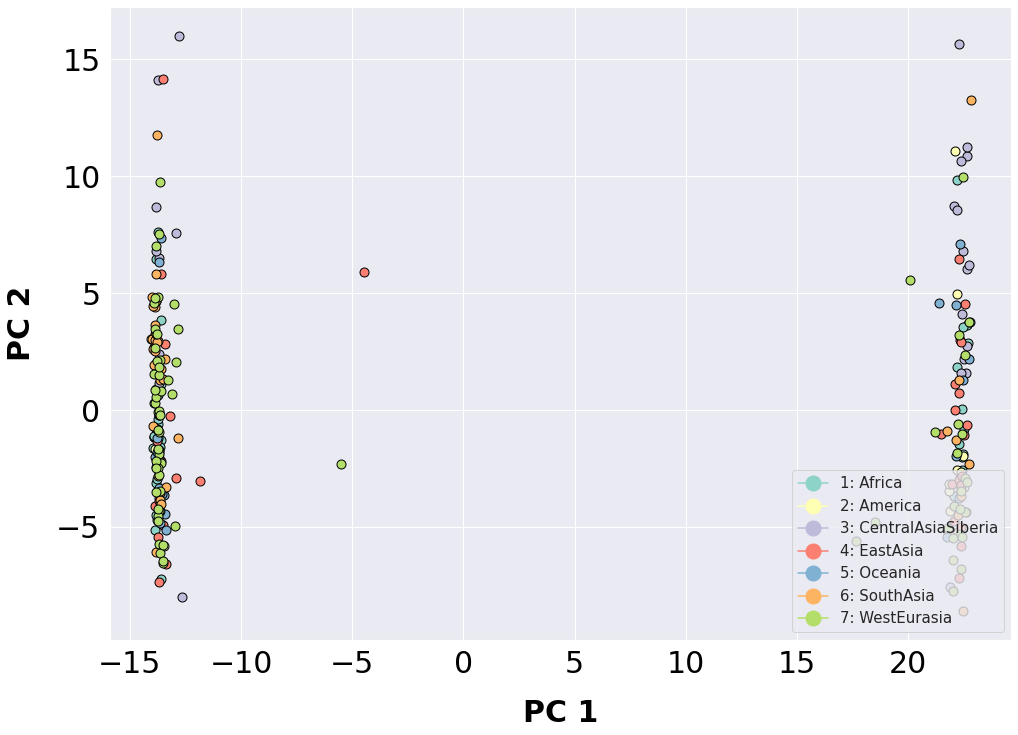

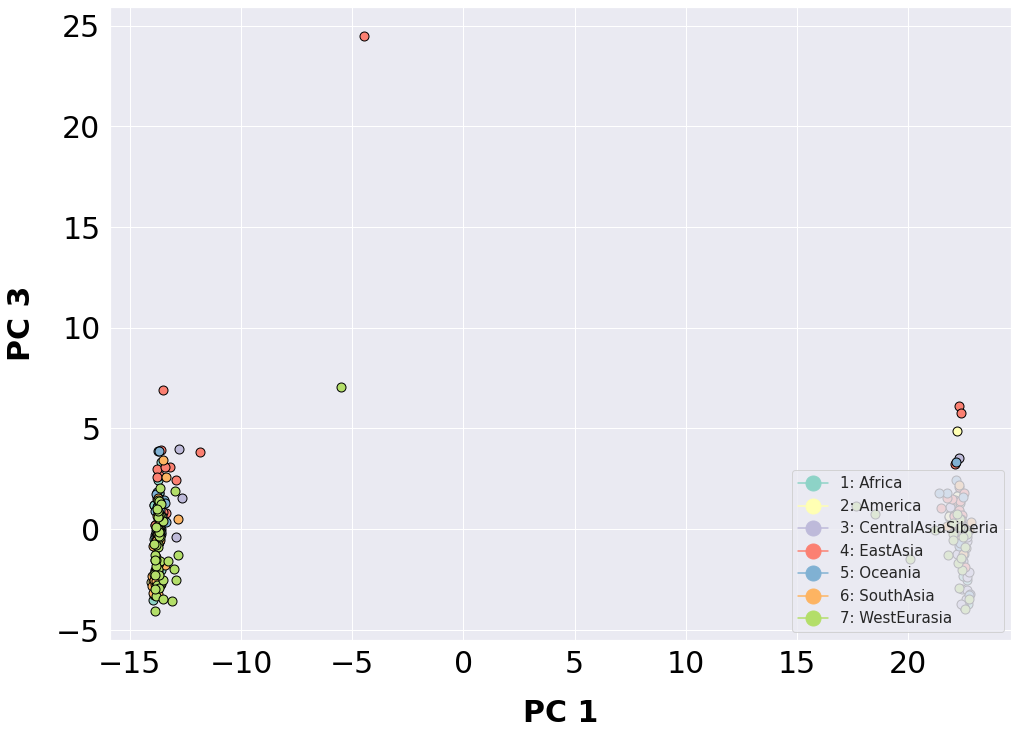

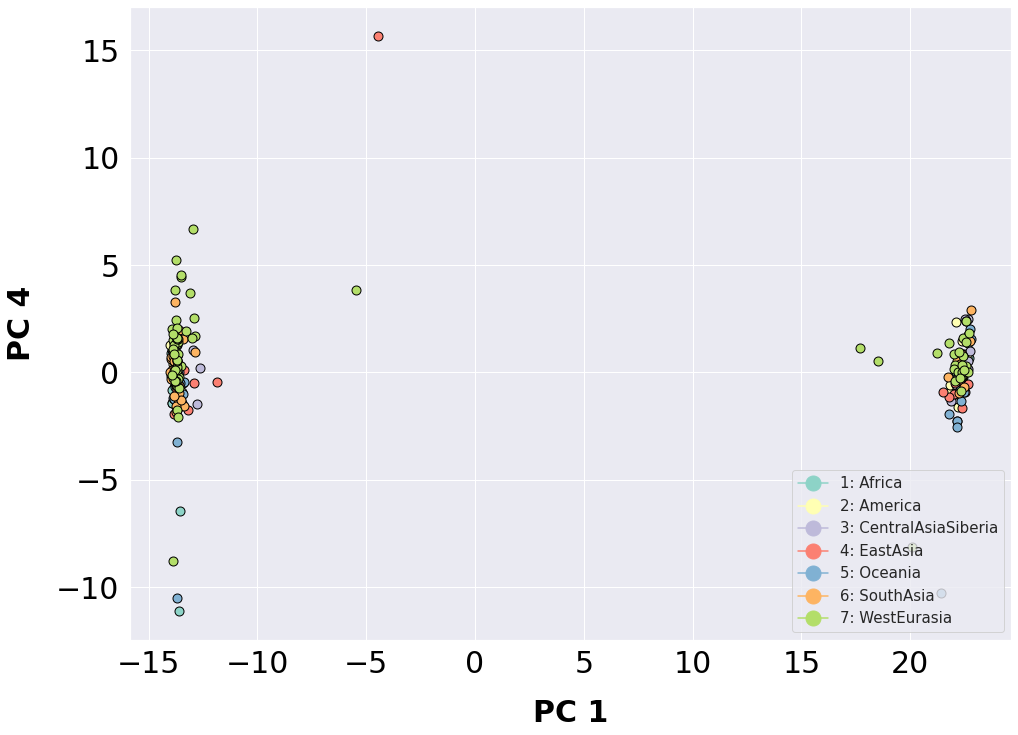

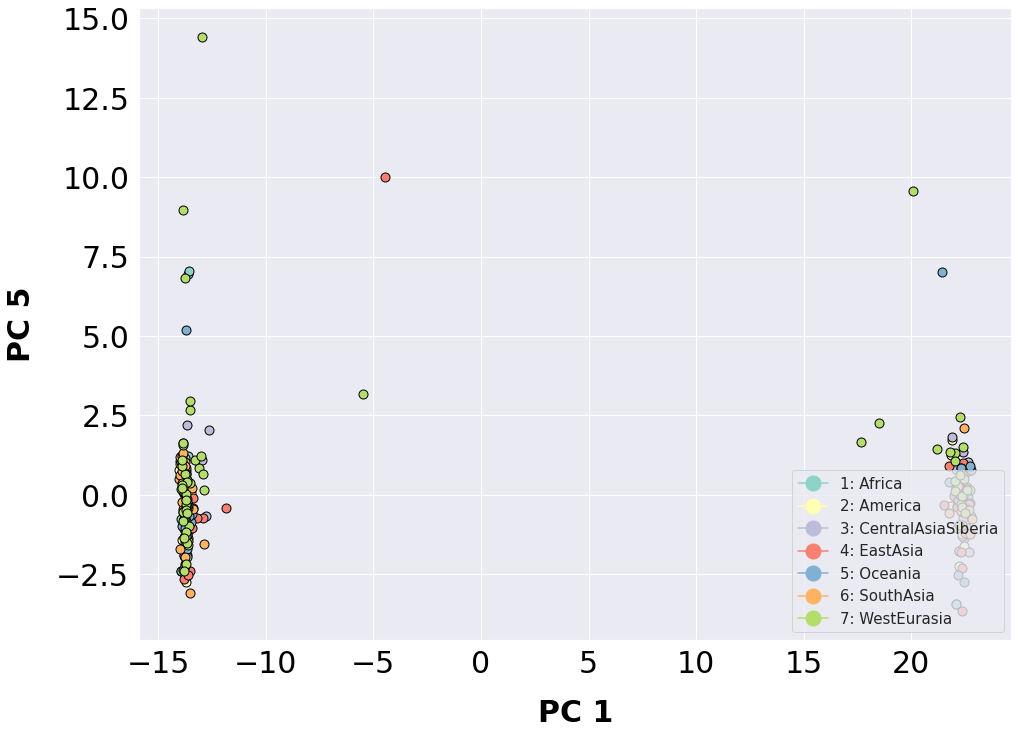

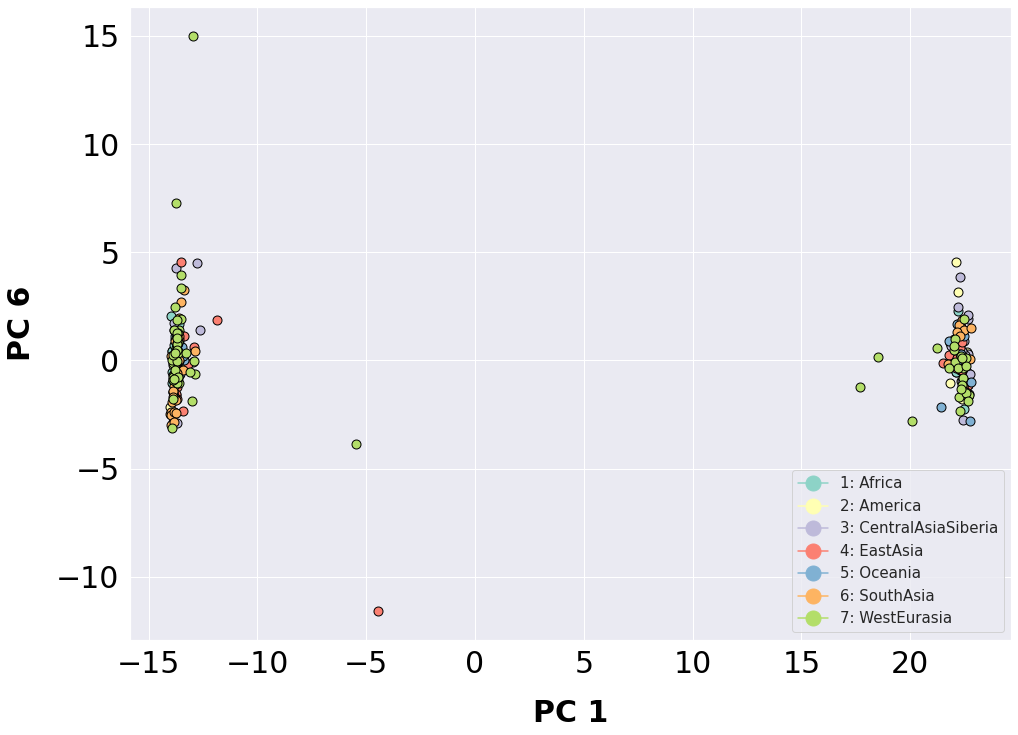

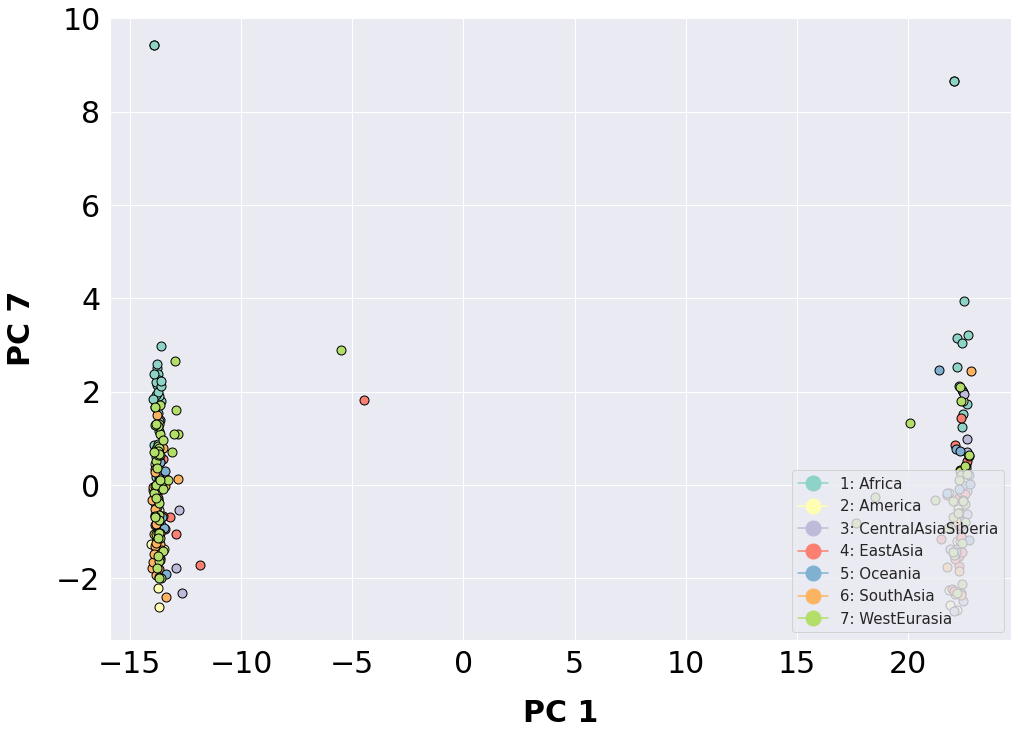

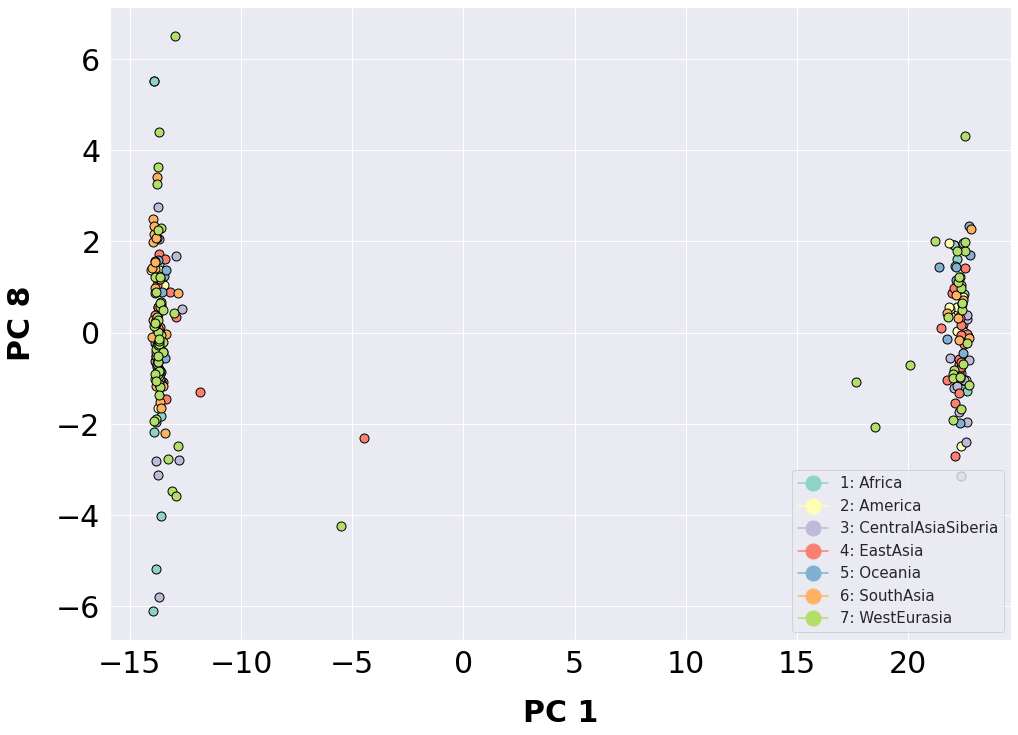

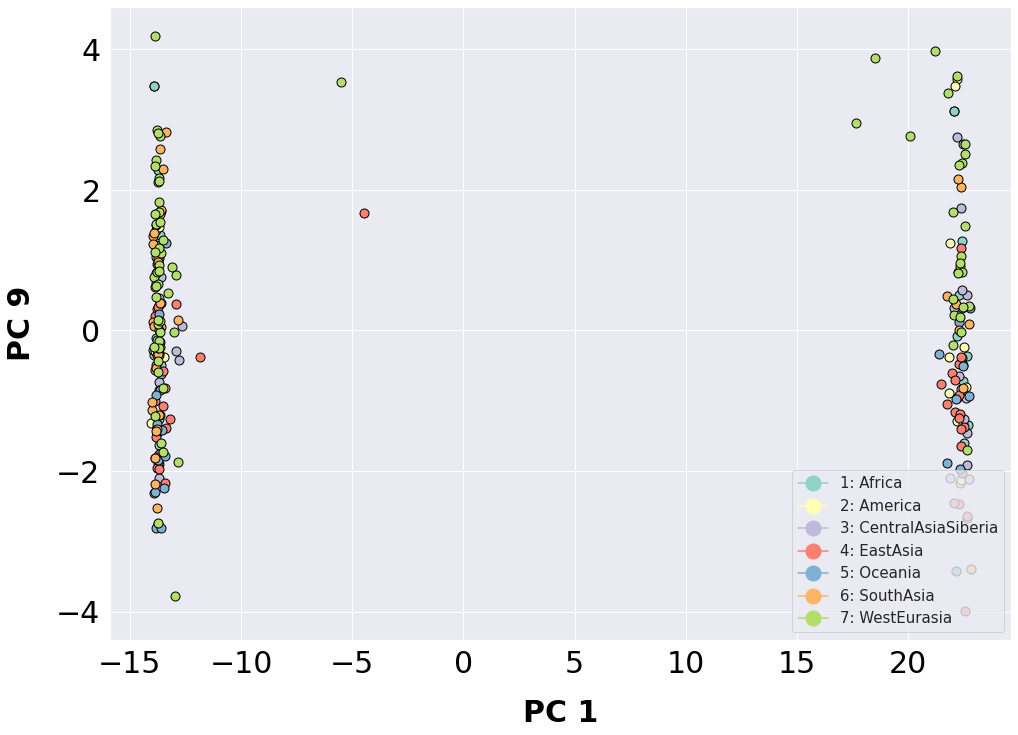

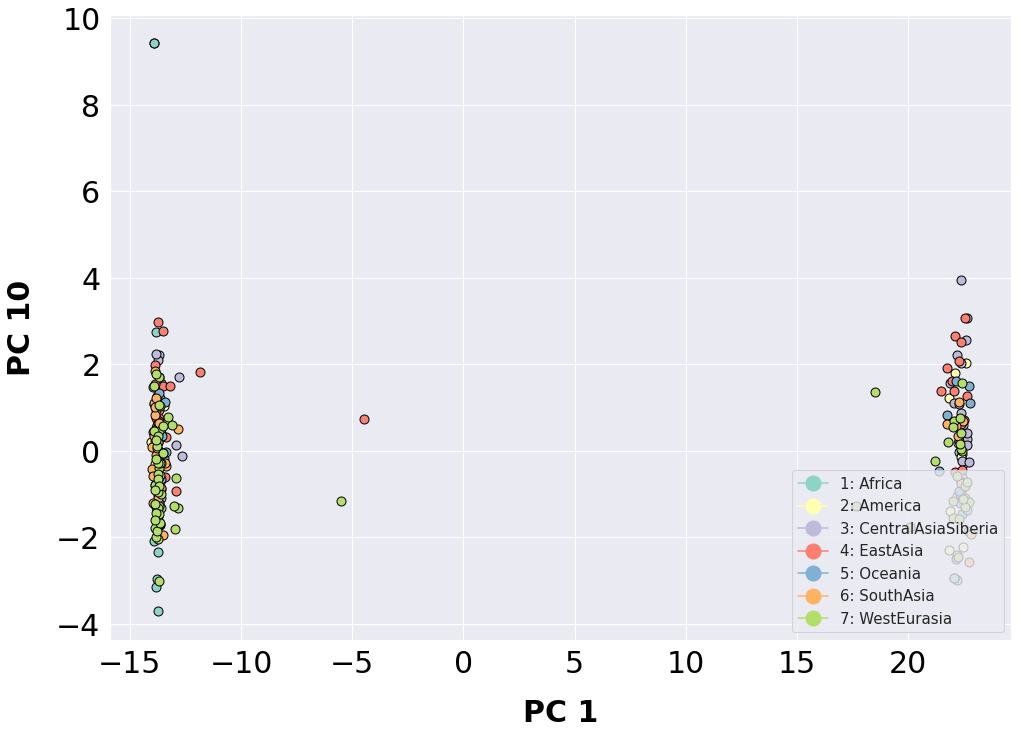

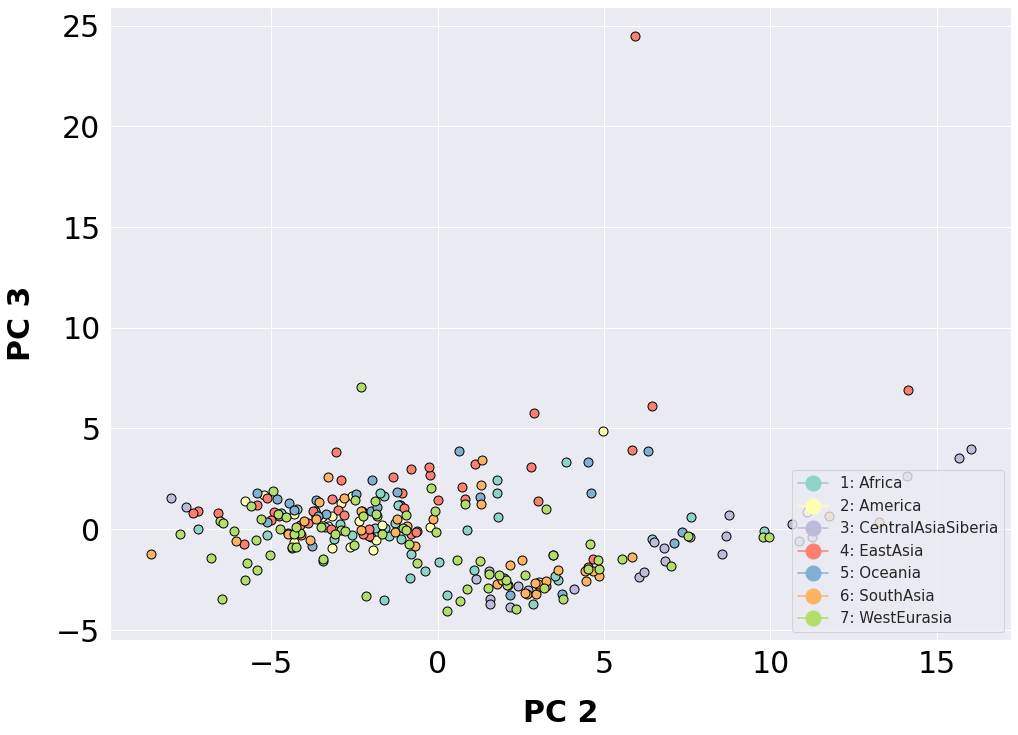

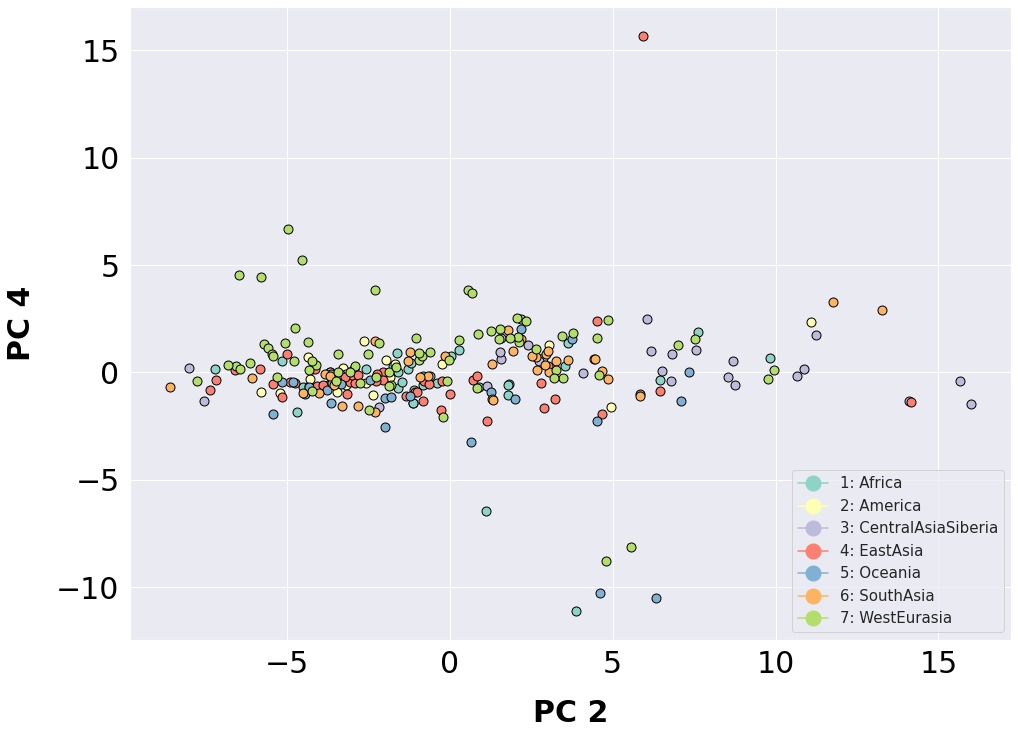

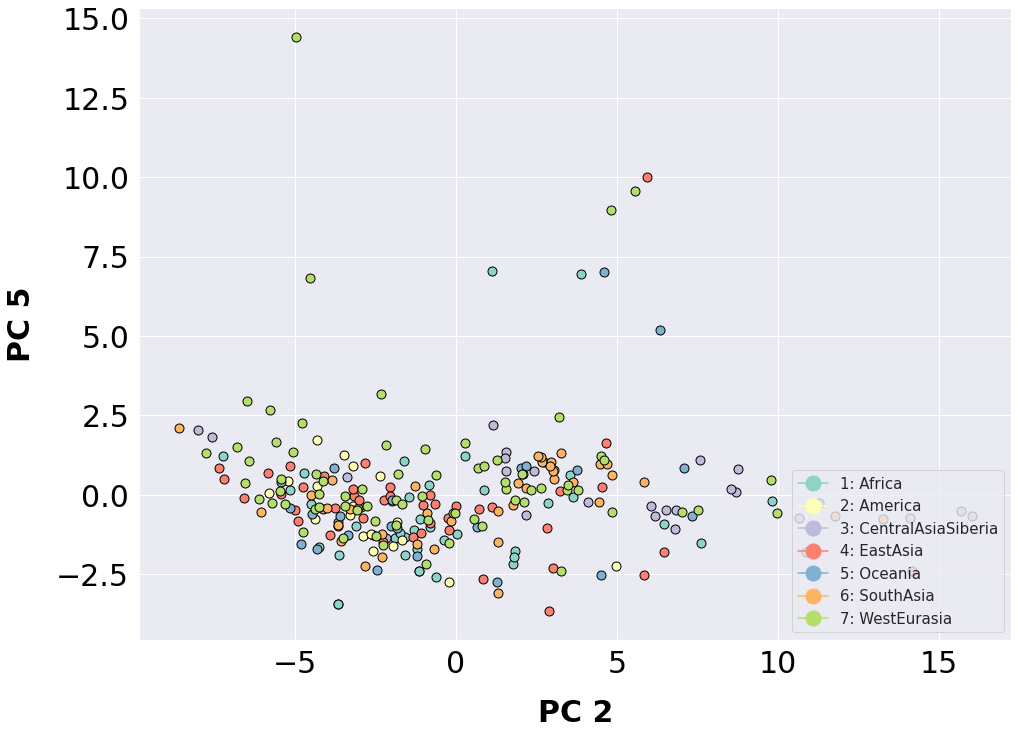

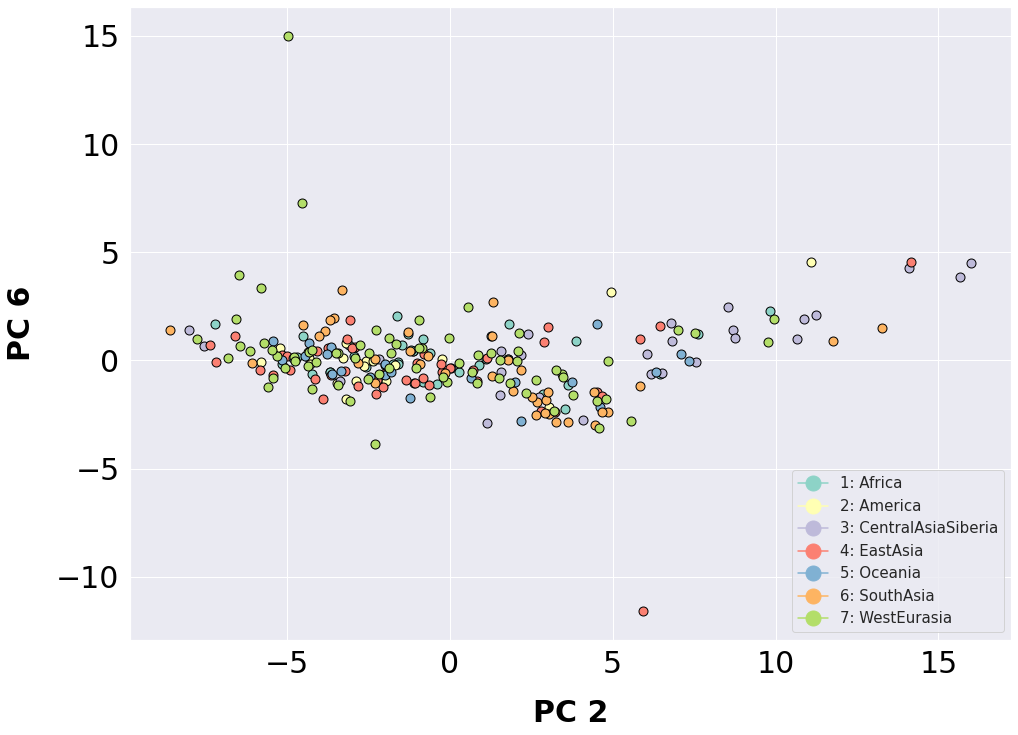

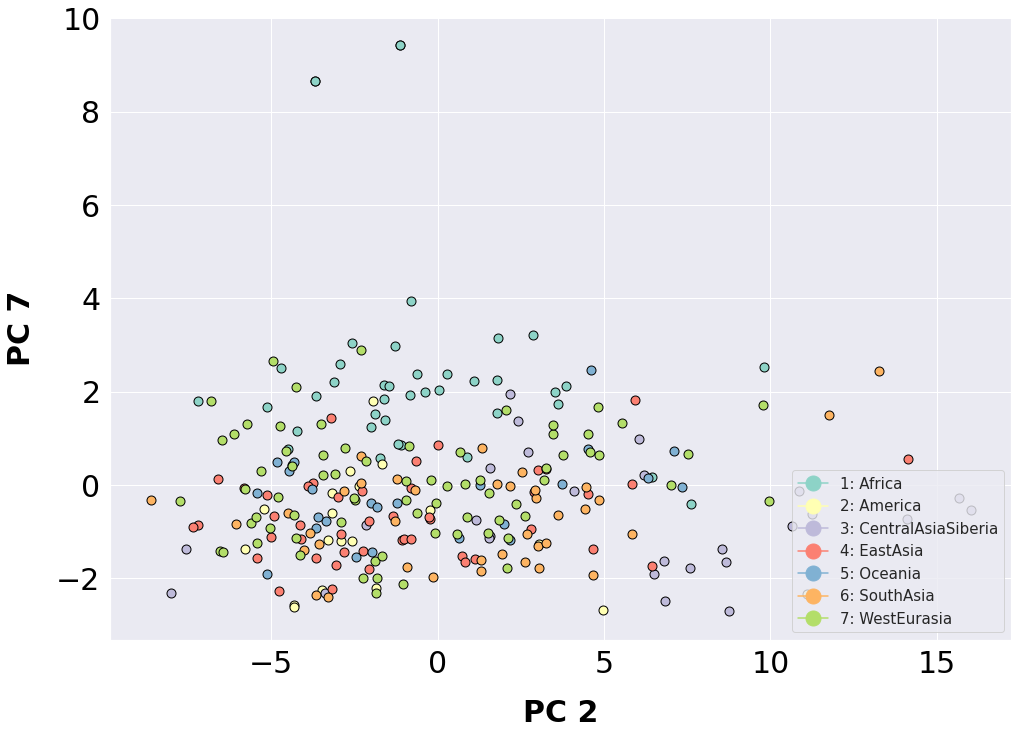

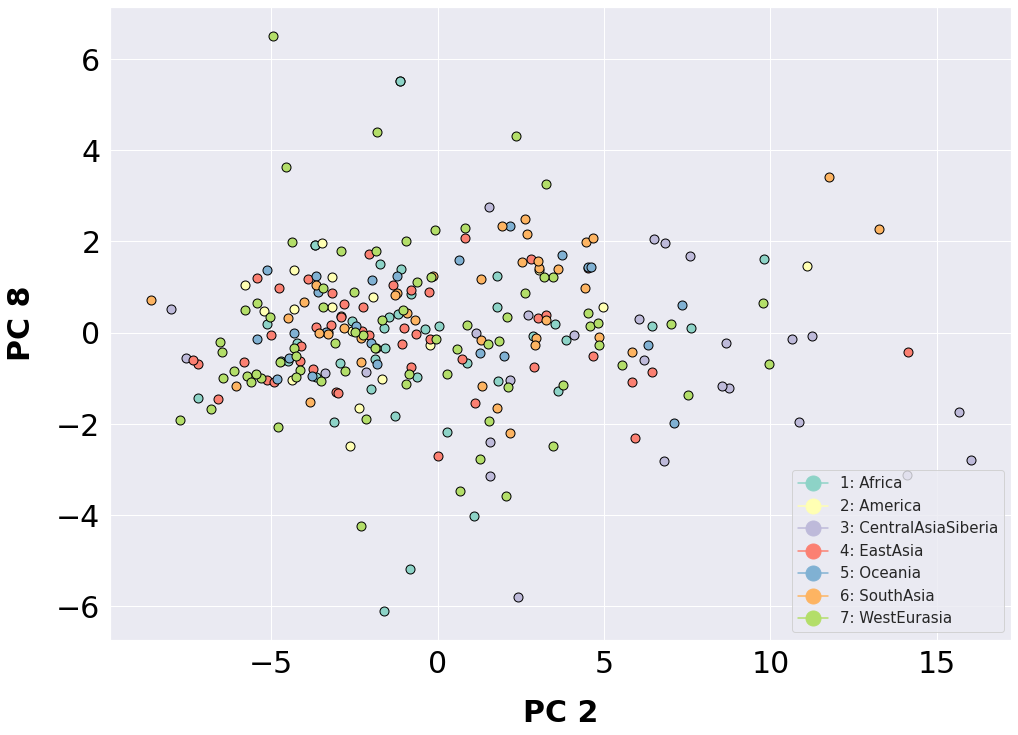

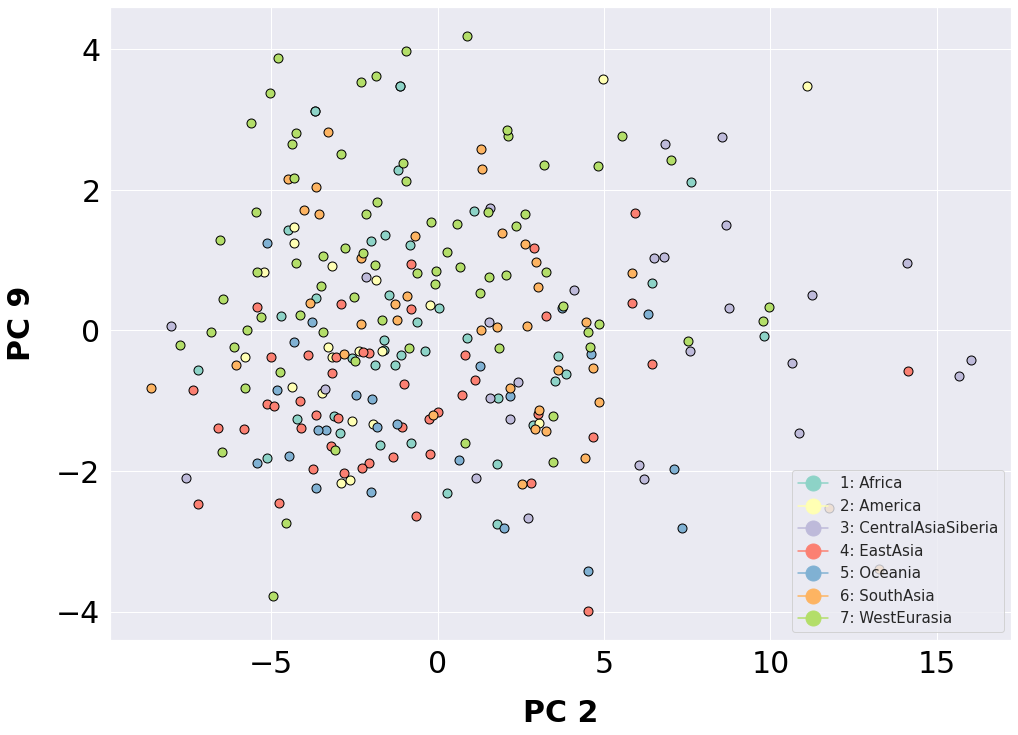

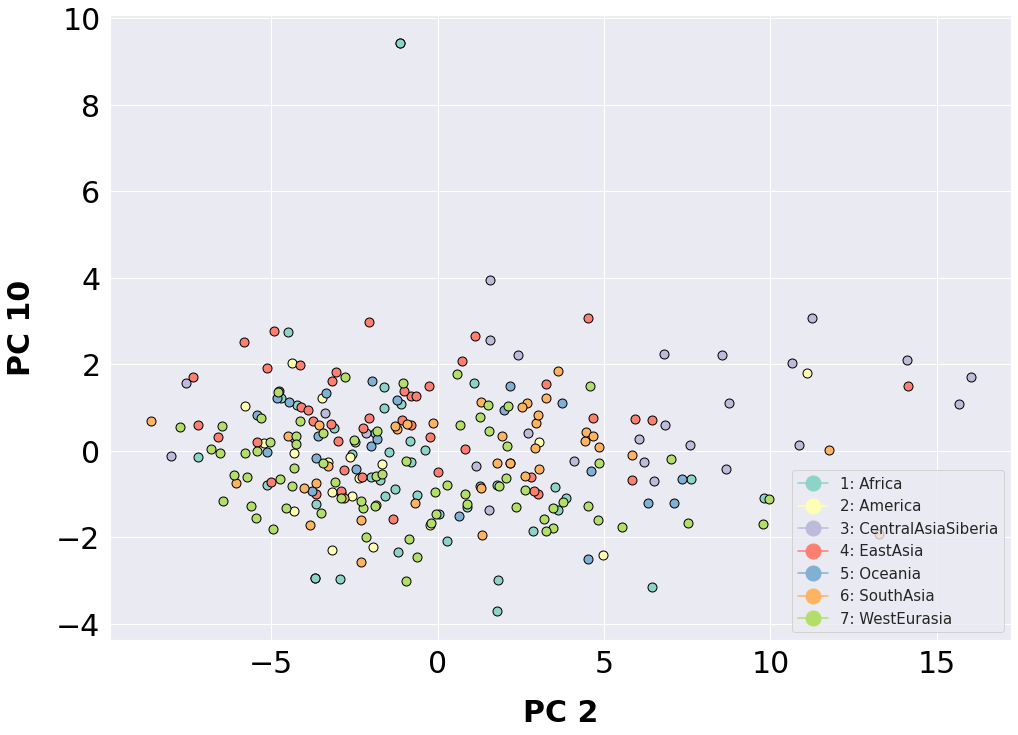

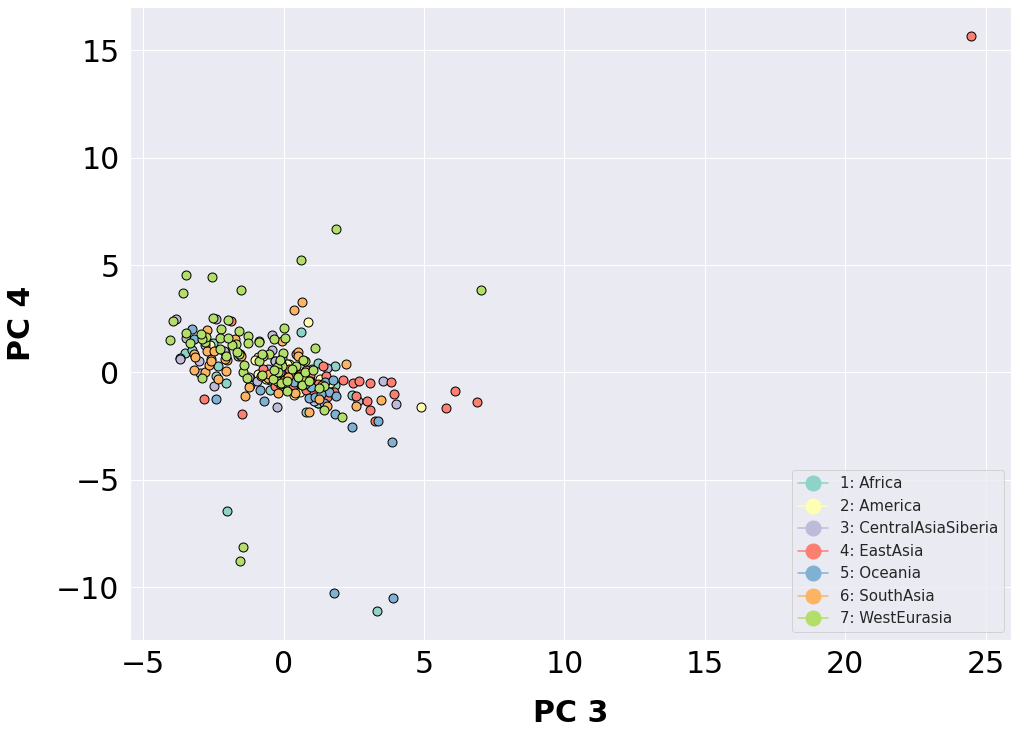

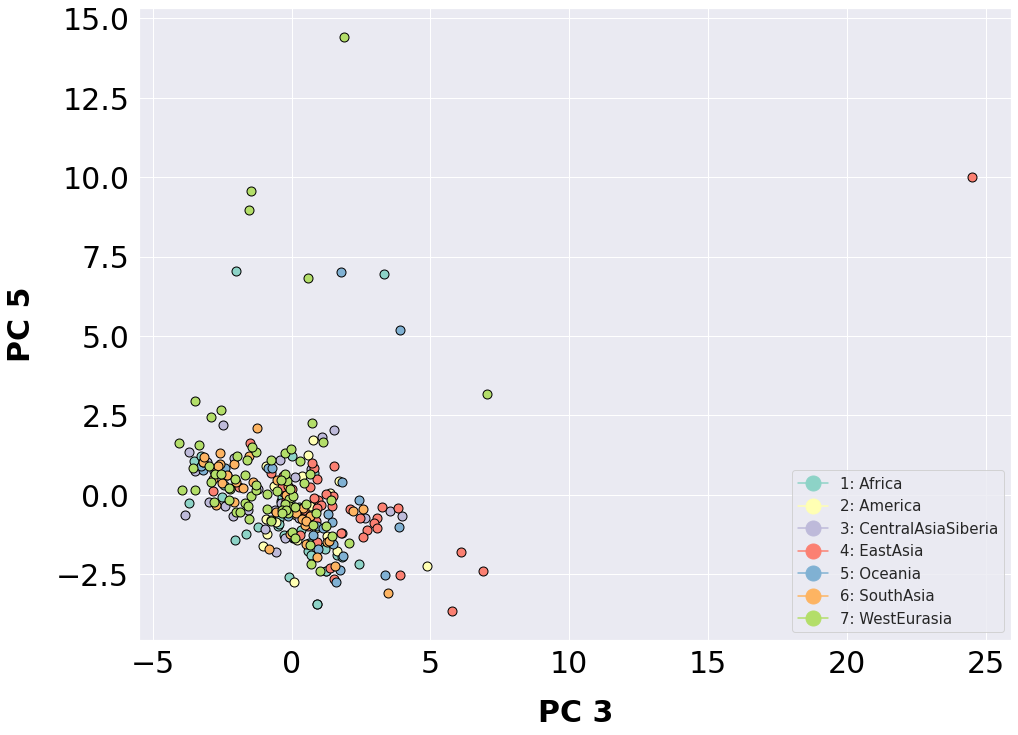

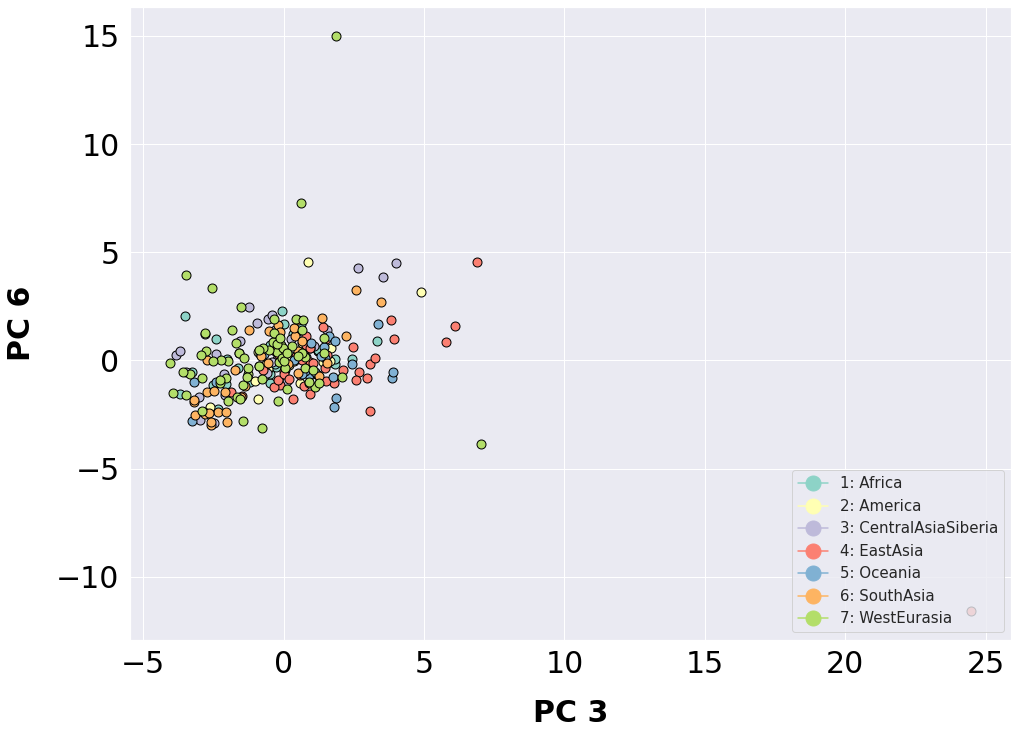

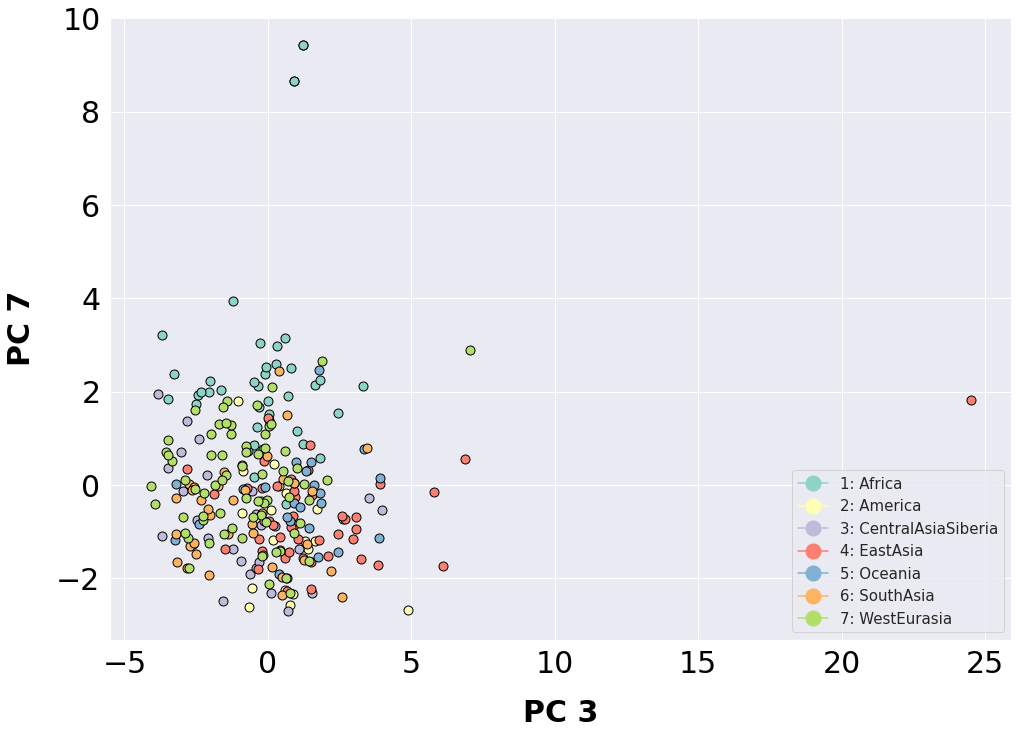

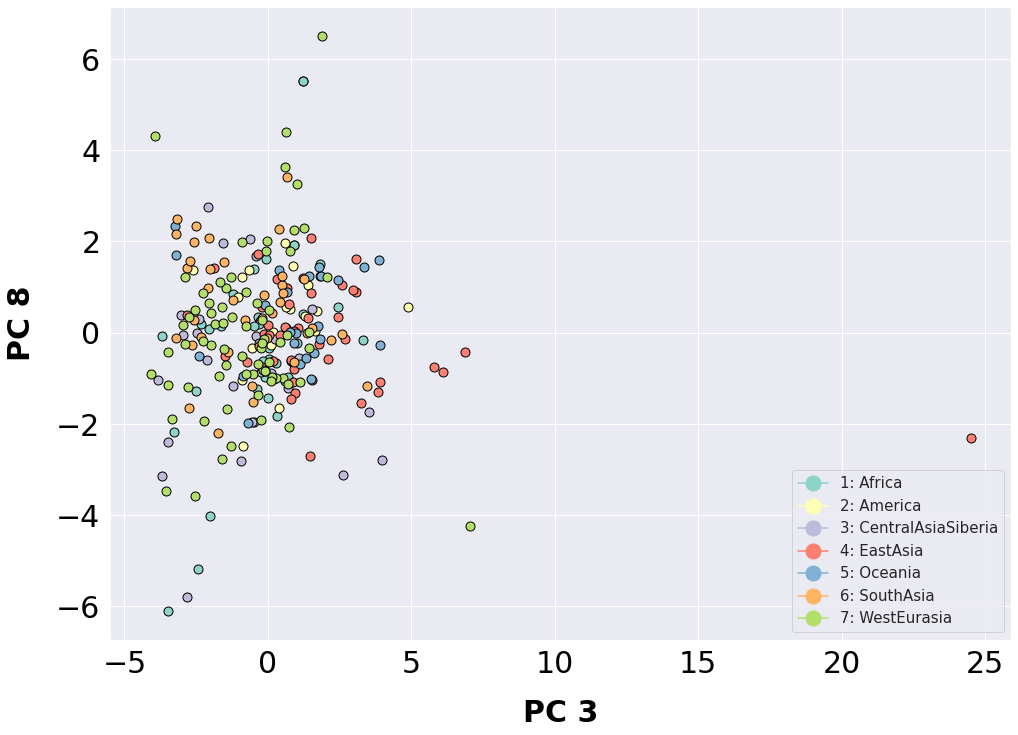

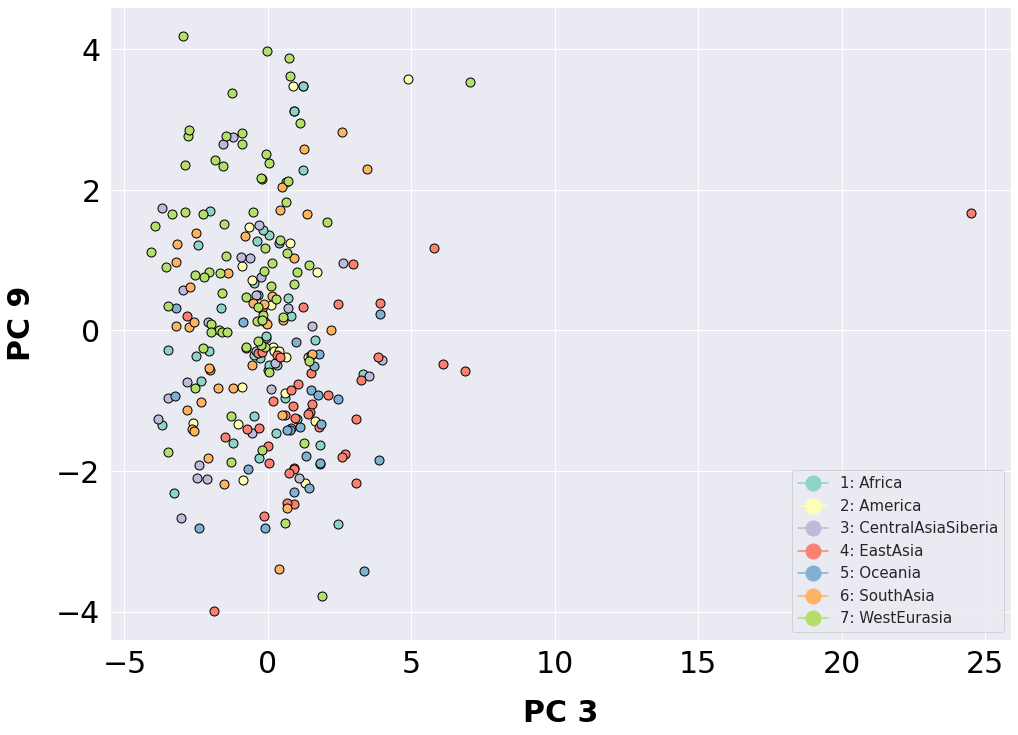

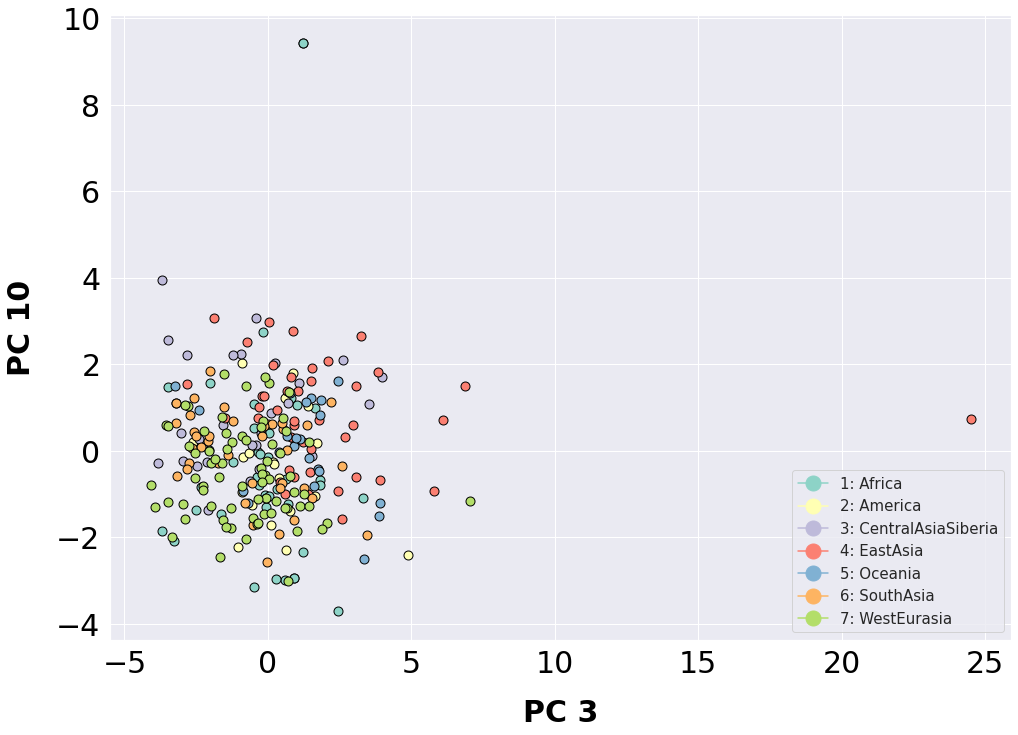

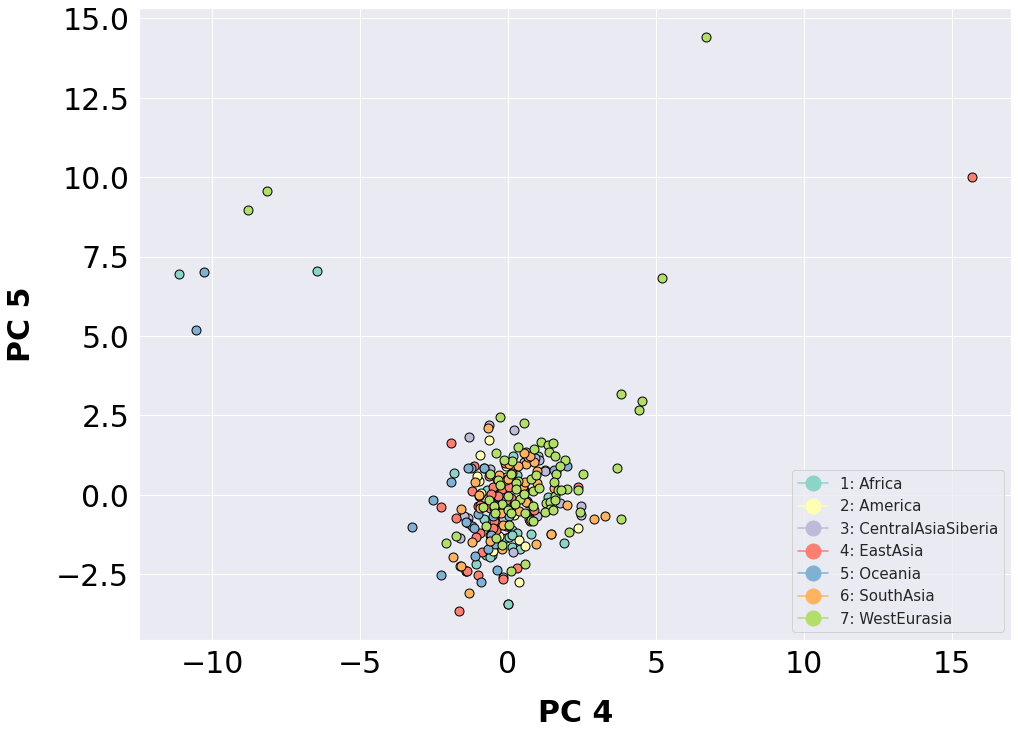

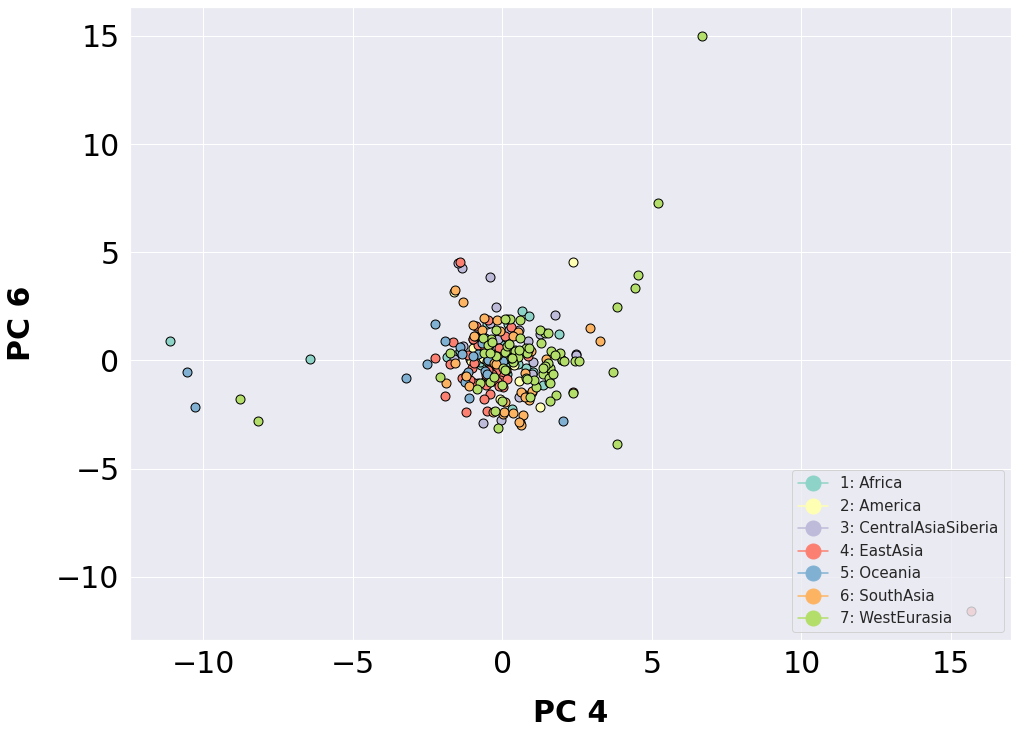

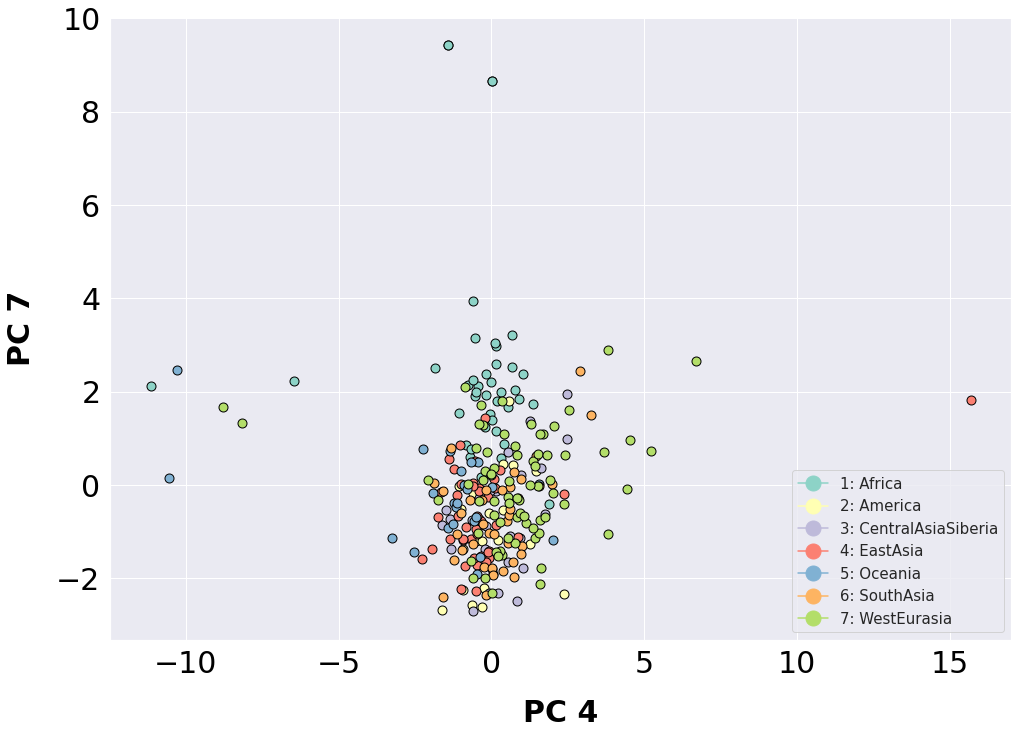

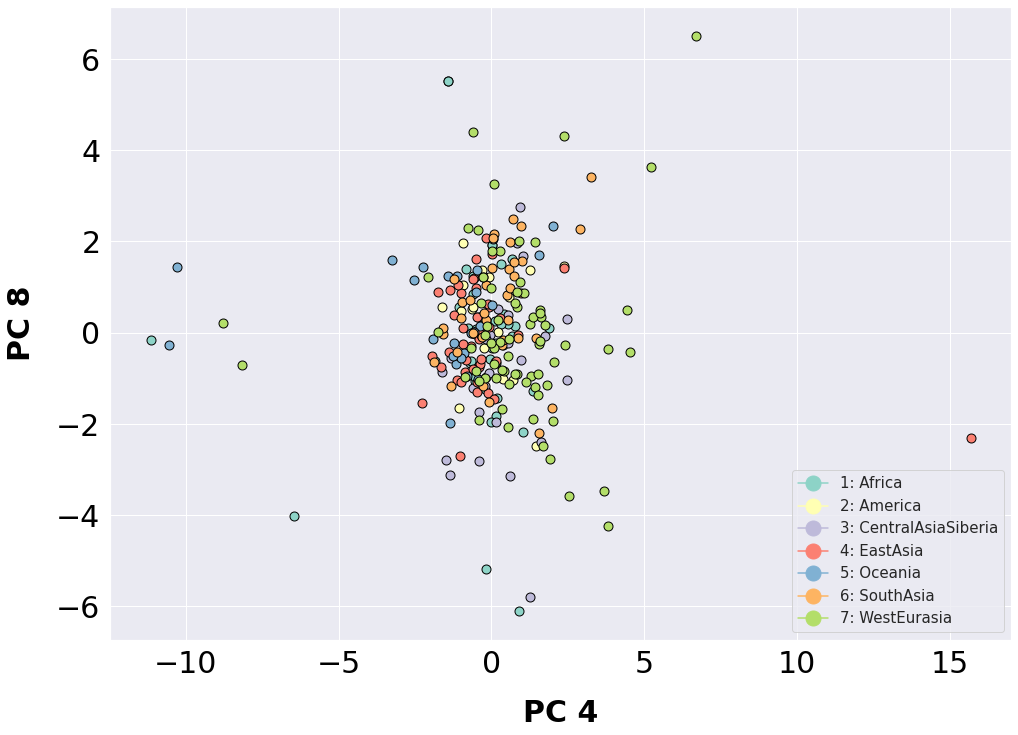

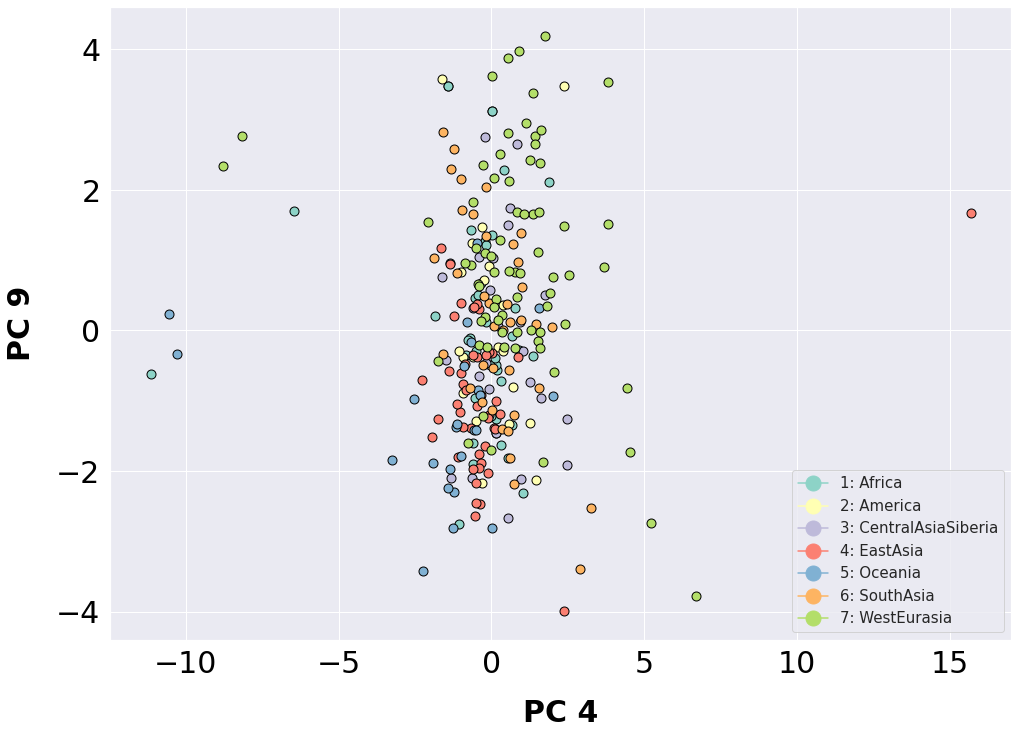

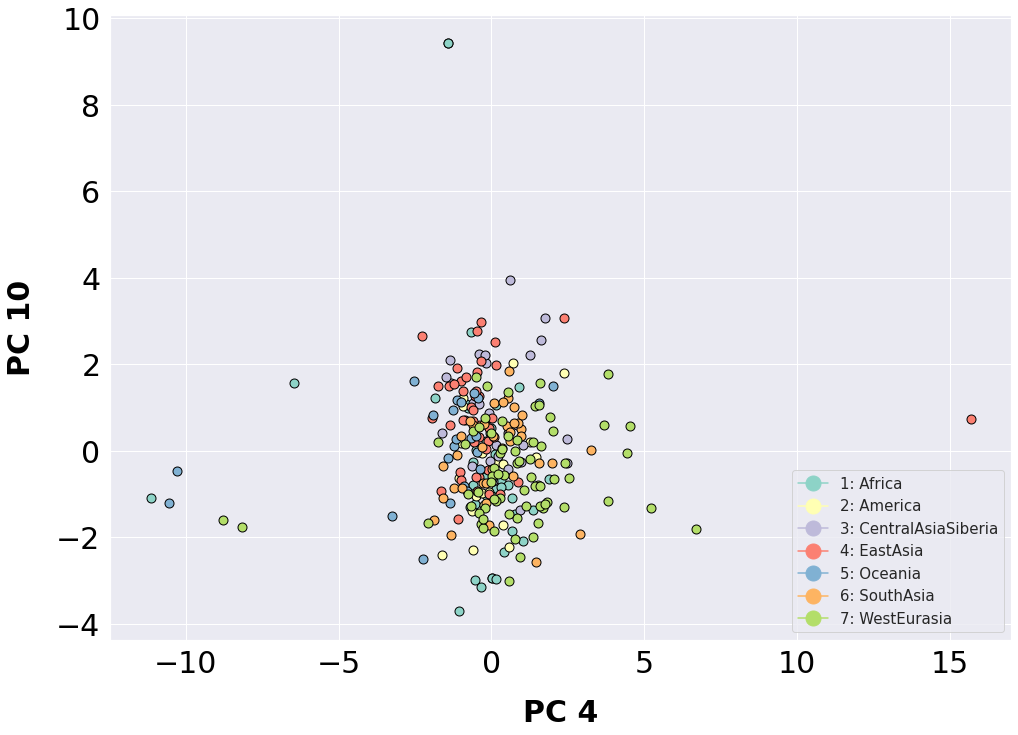

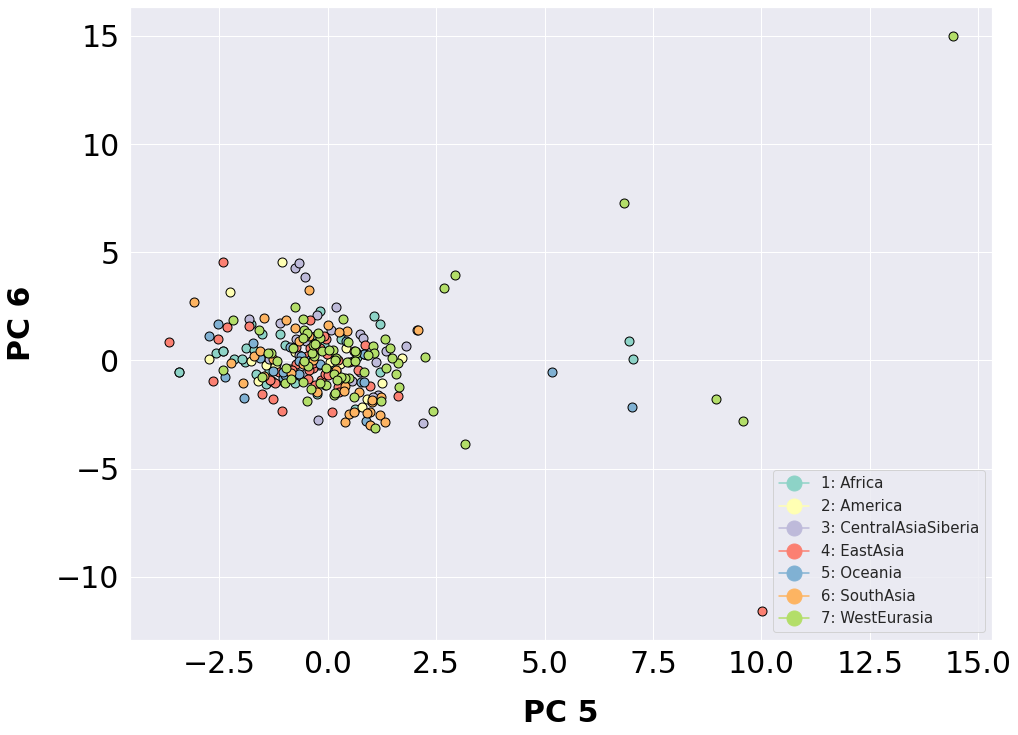

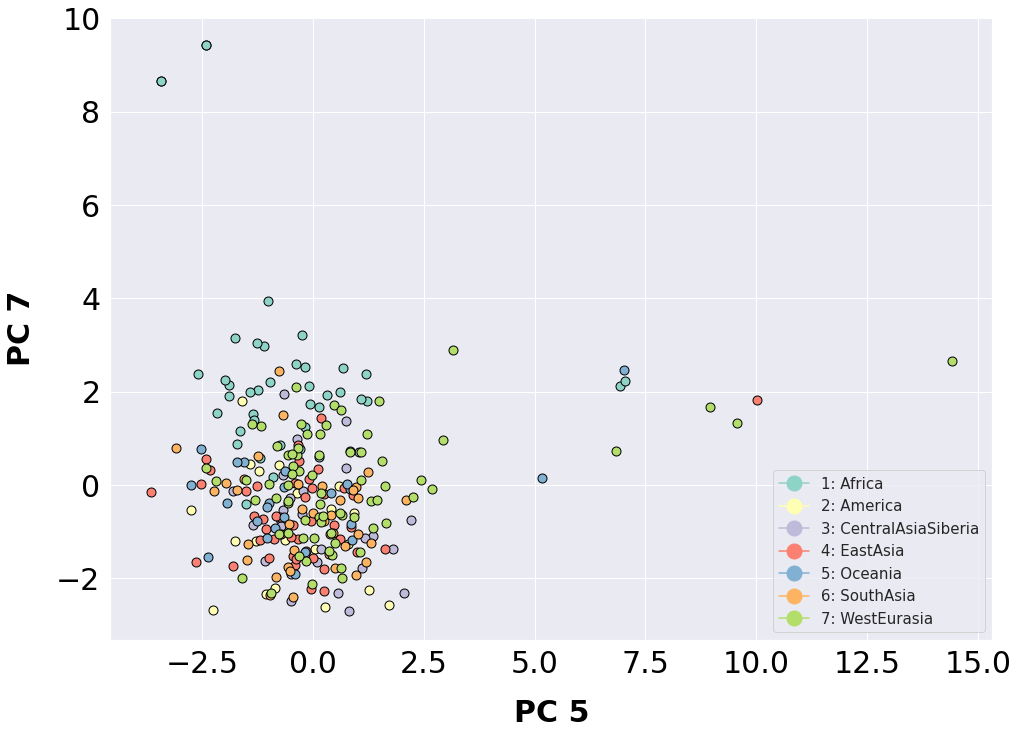

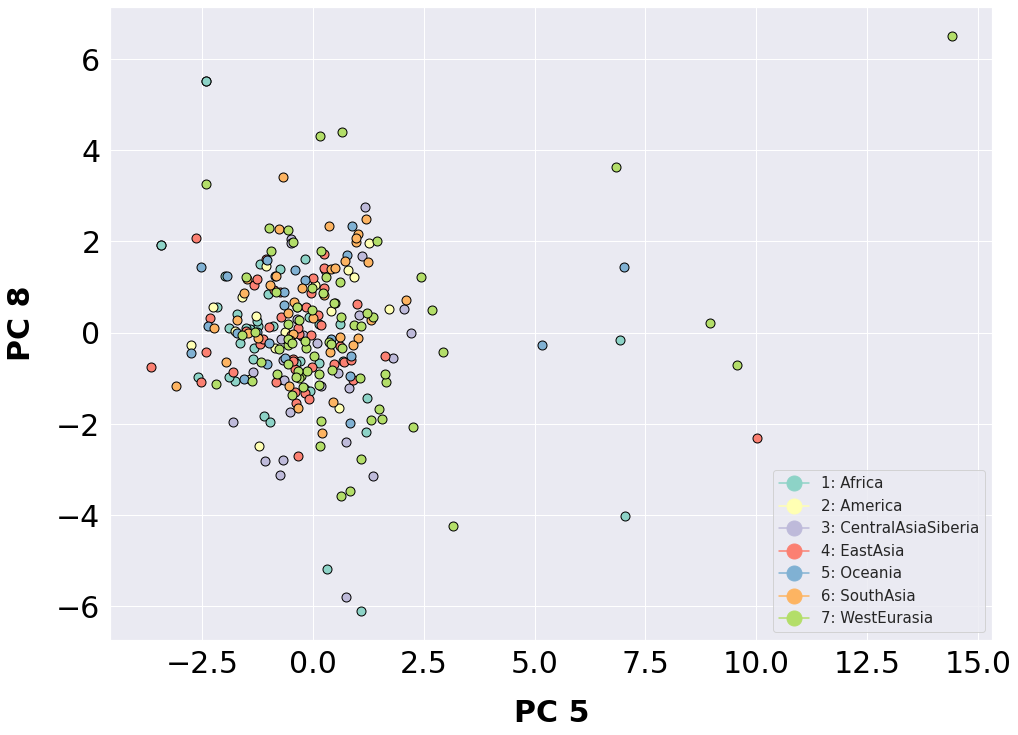

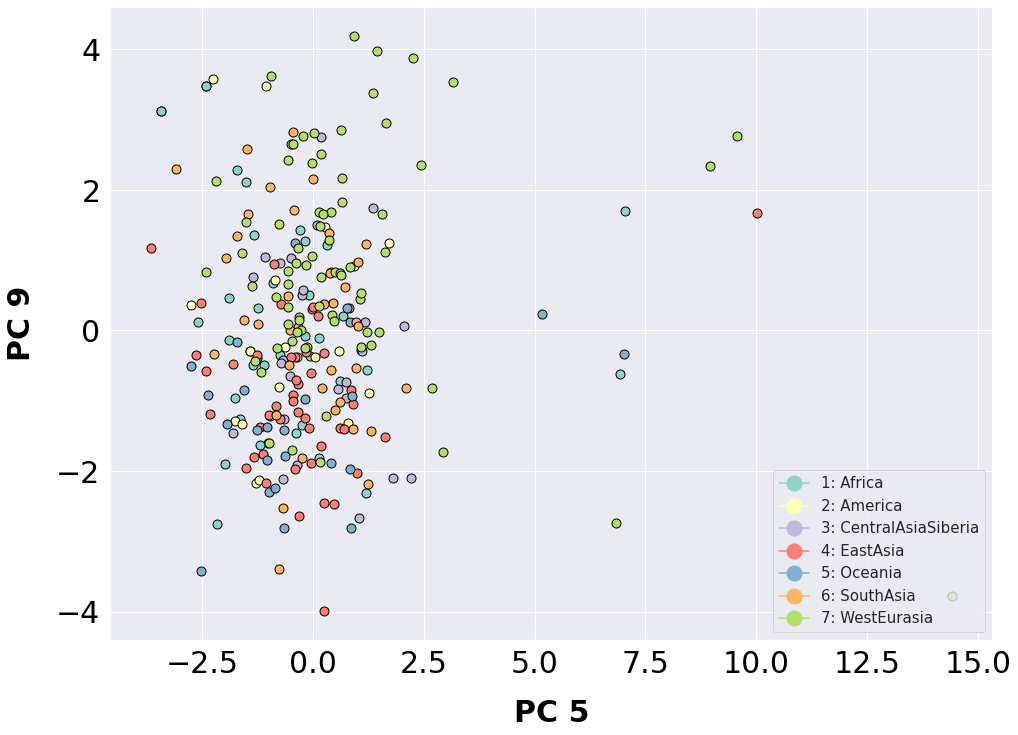

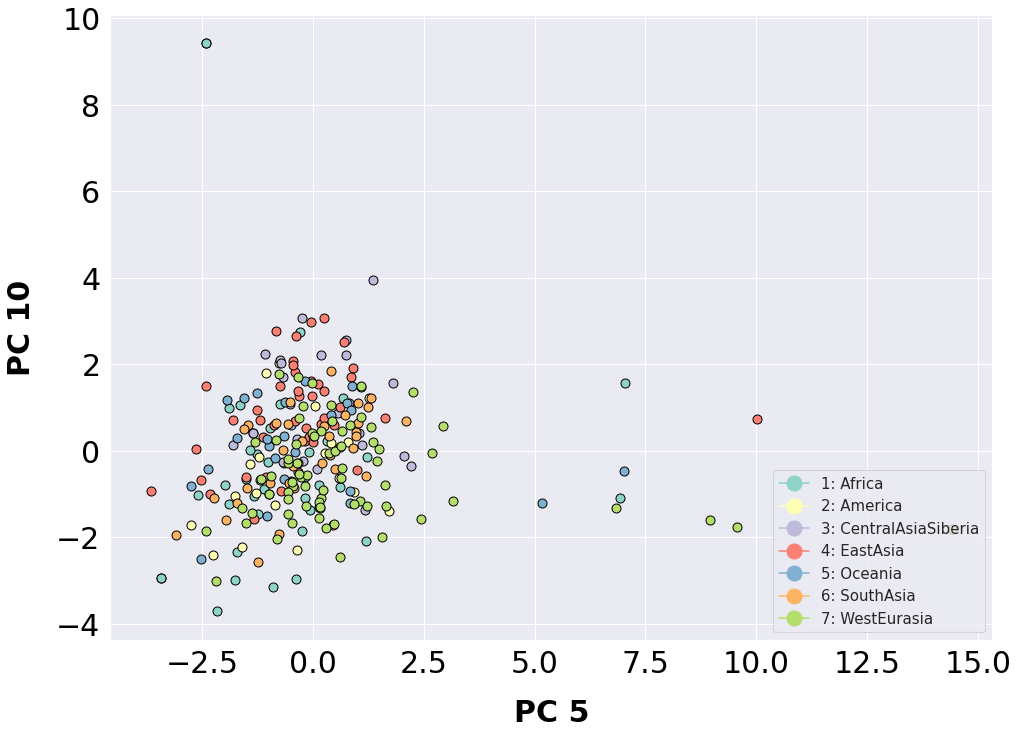

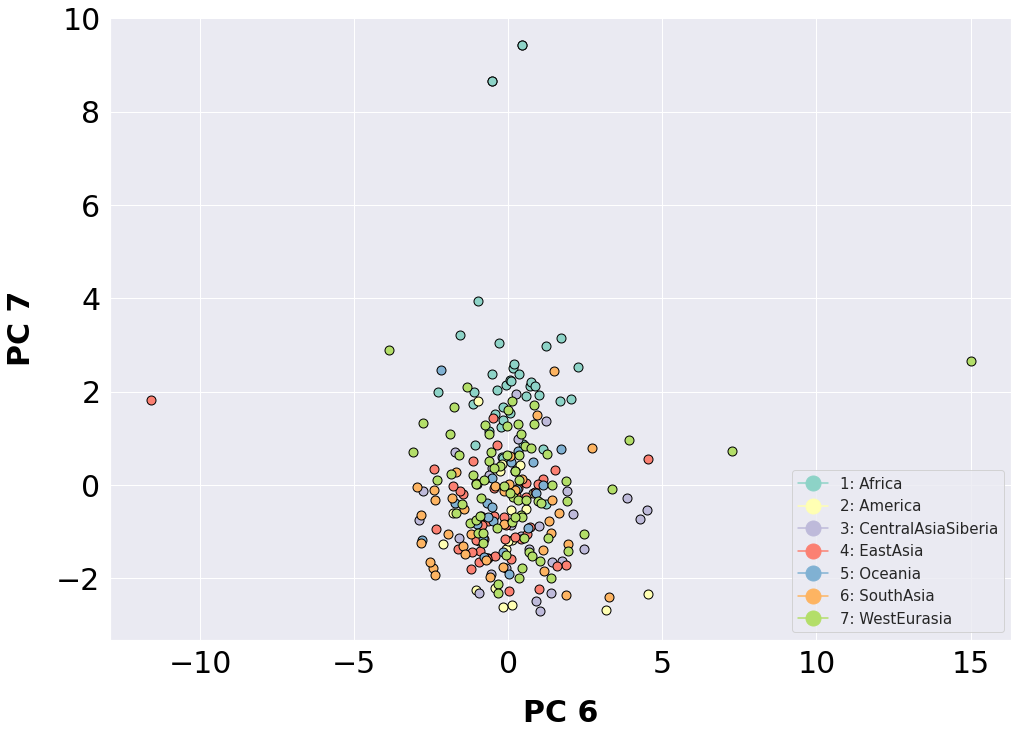

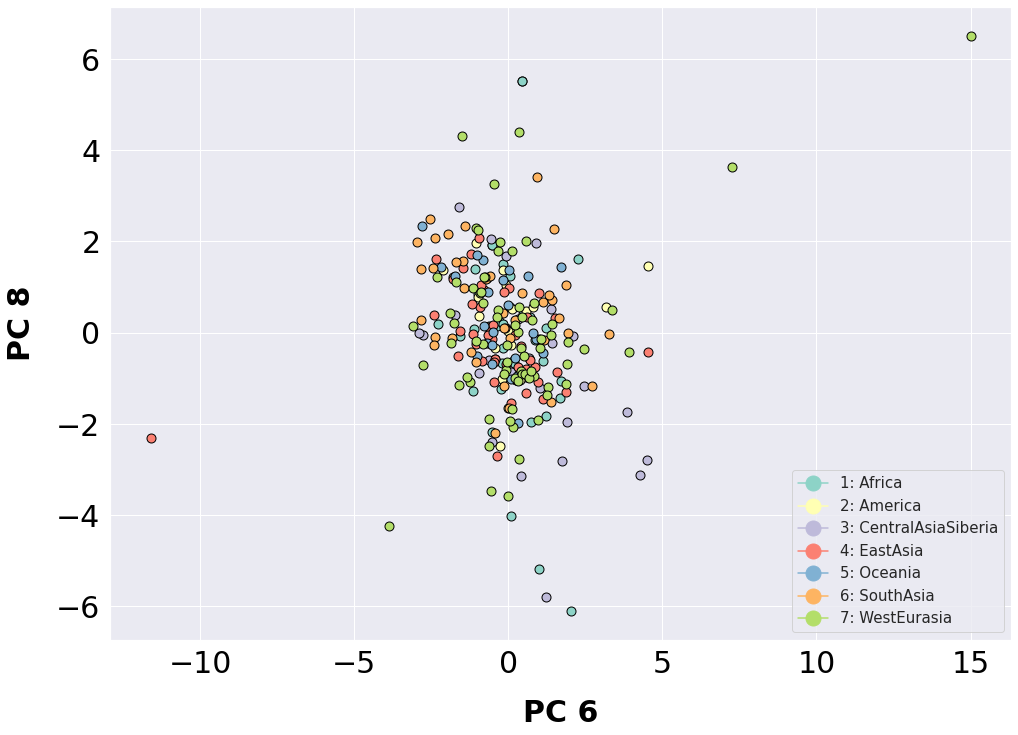

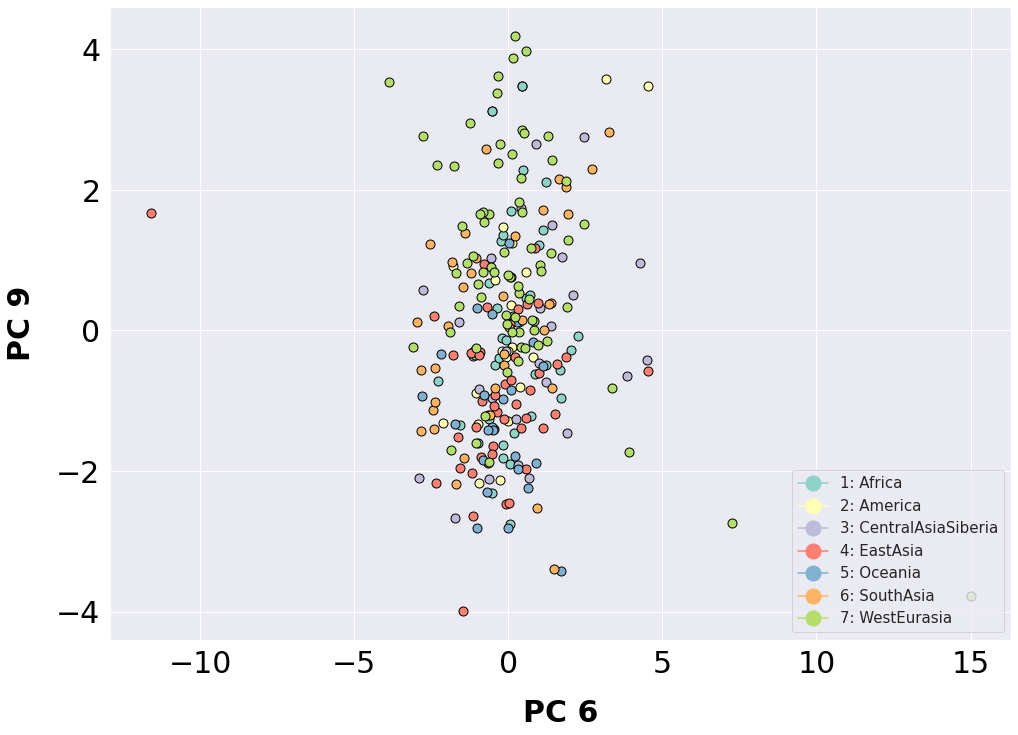

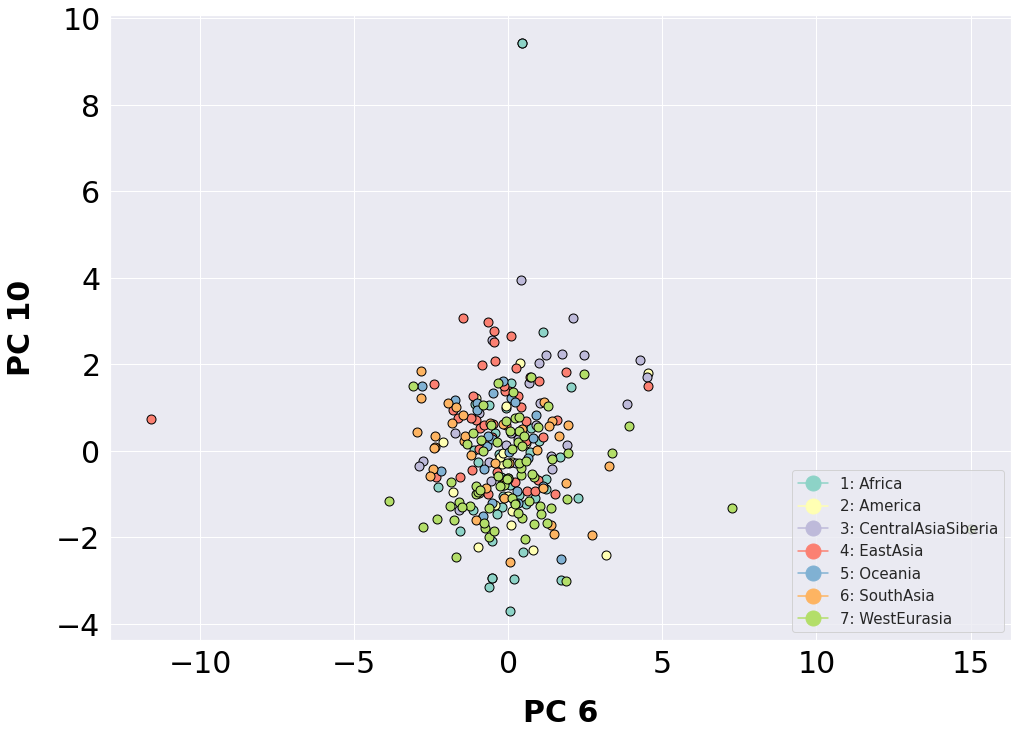

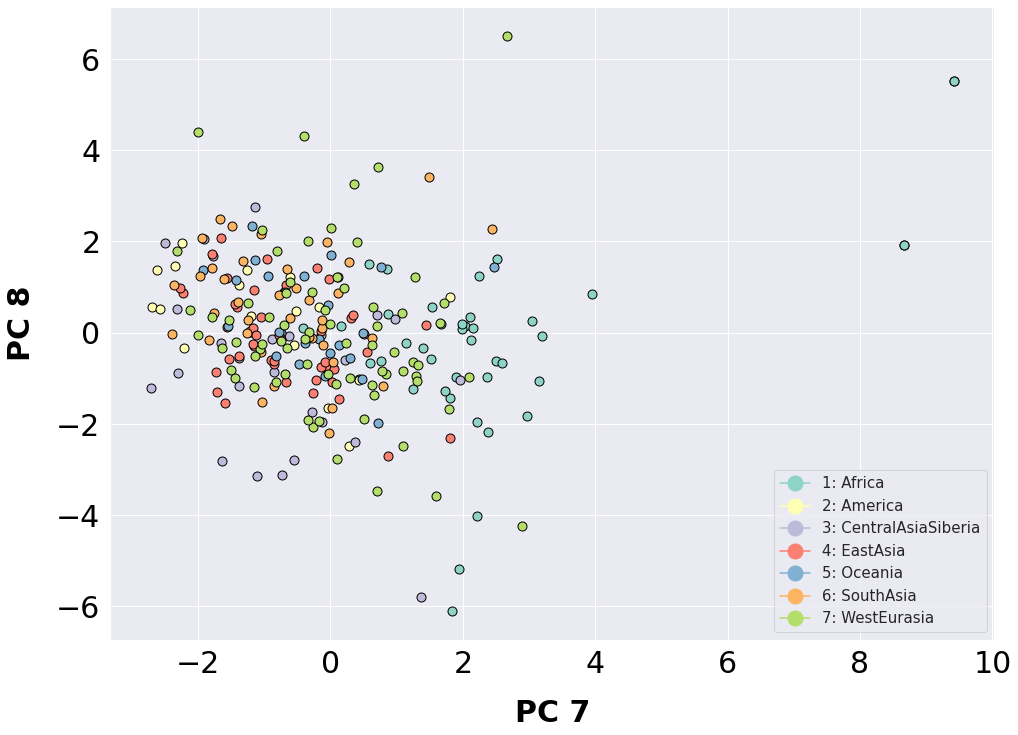

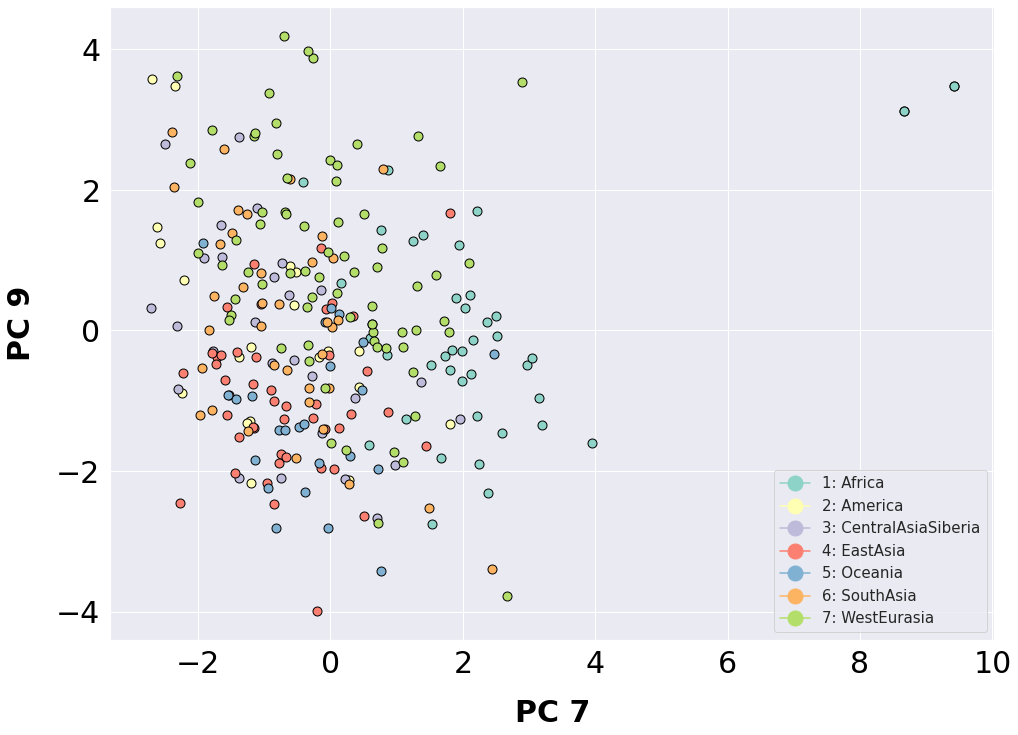

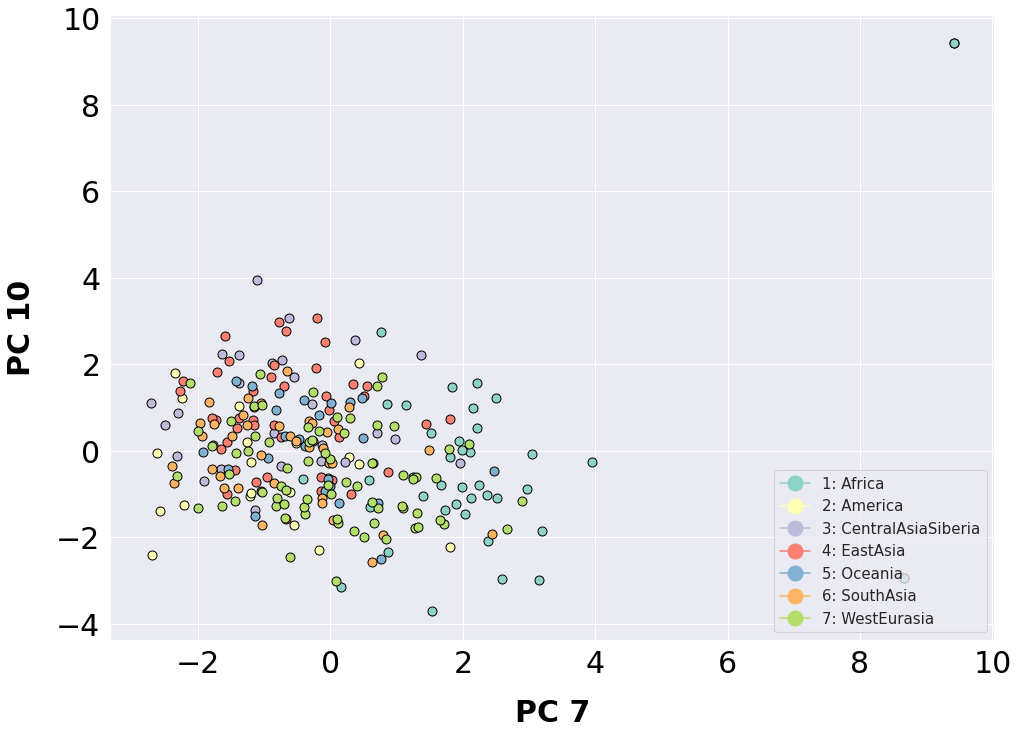

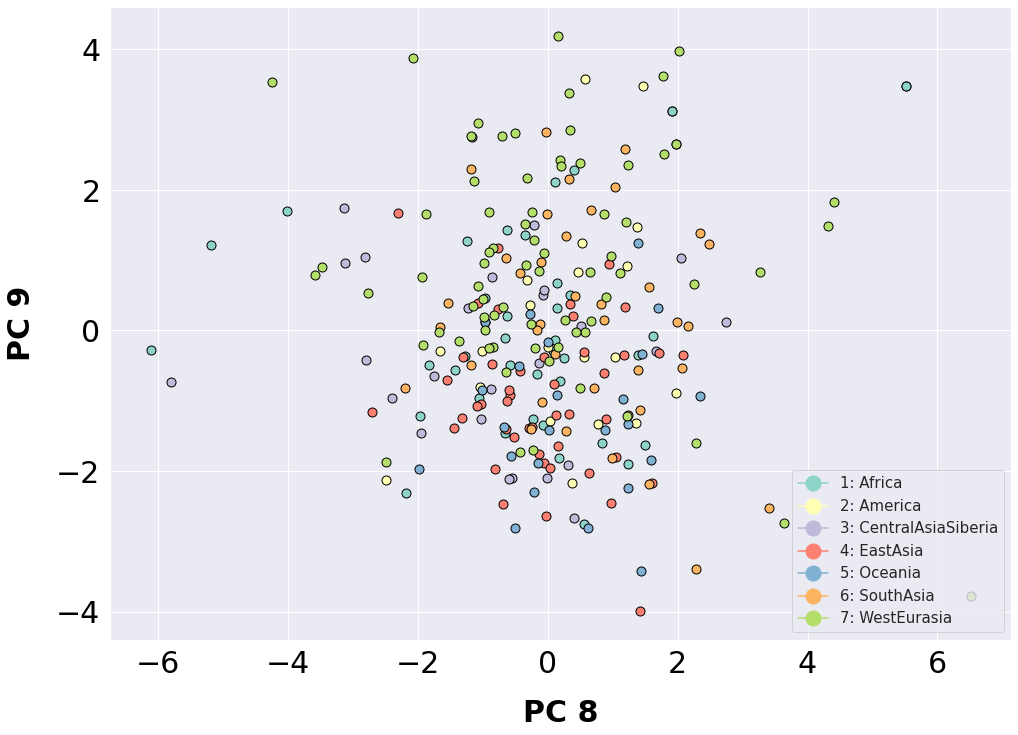

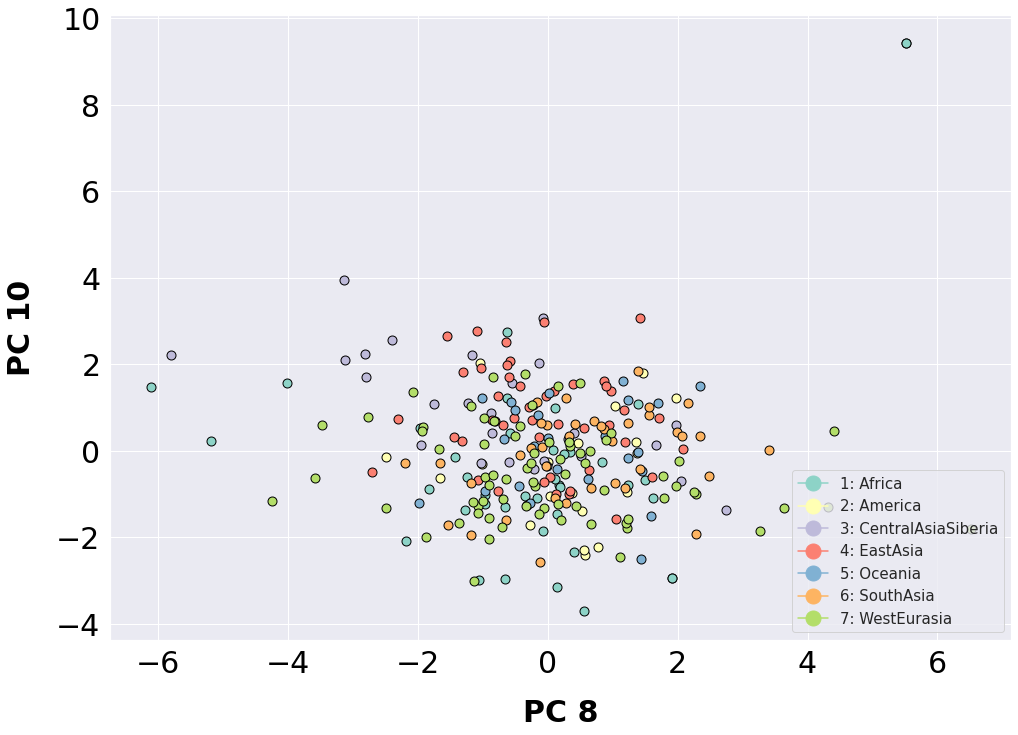

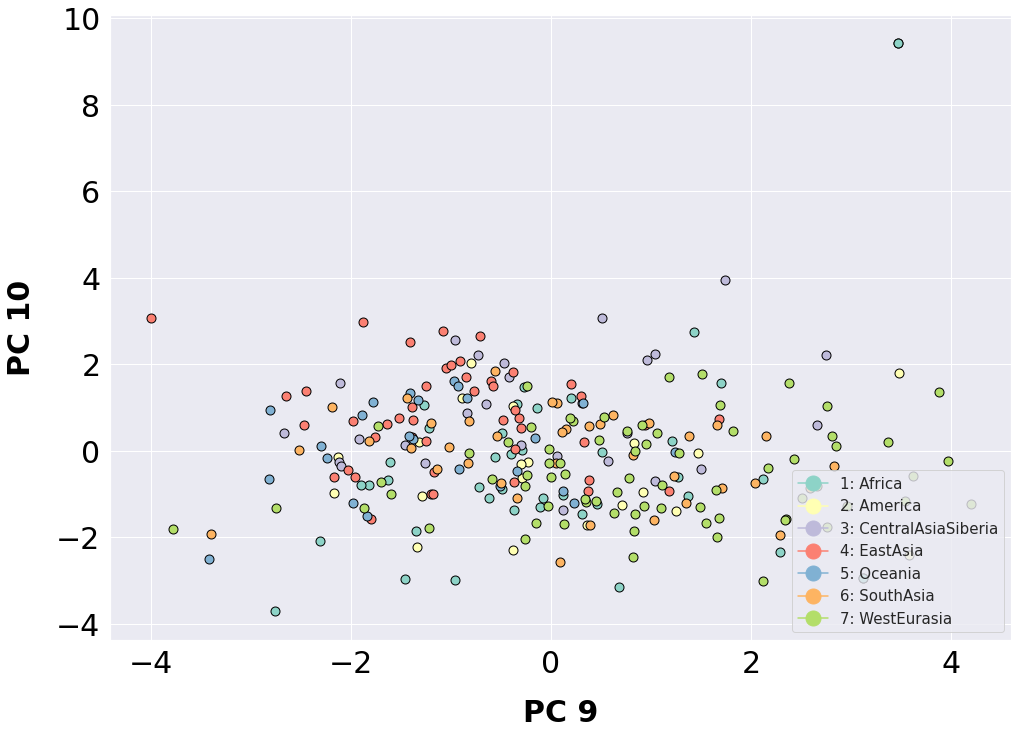

In [200]:
components = [1,2,3,4,5,6,7,8,9,10]

combinations_components = list(combinations(components,2))
for i in combinations_components:
    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='REGION', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    #print(str(i[0]))
#    plot_scatter_cluster(data=df_pca, abscissa='component_8', ordinate='component_9', label_horizontal='Component 1', label_vertical='Component 3', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    

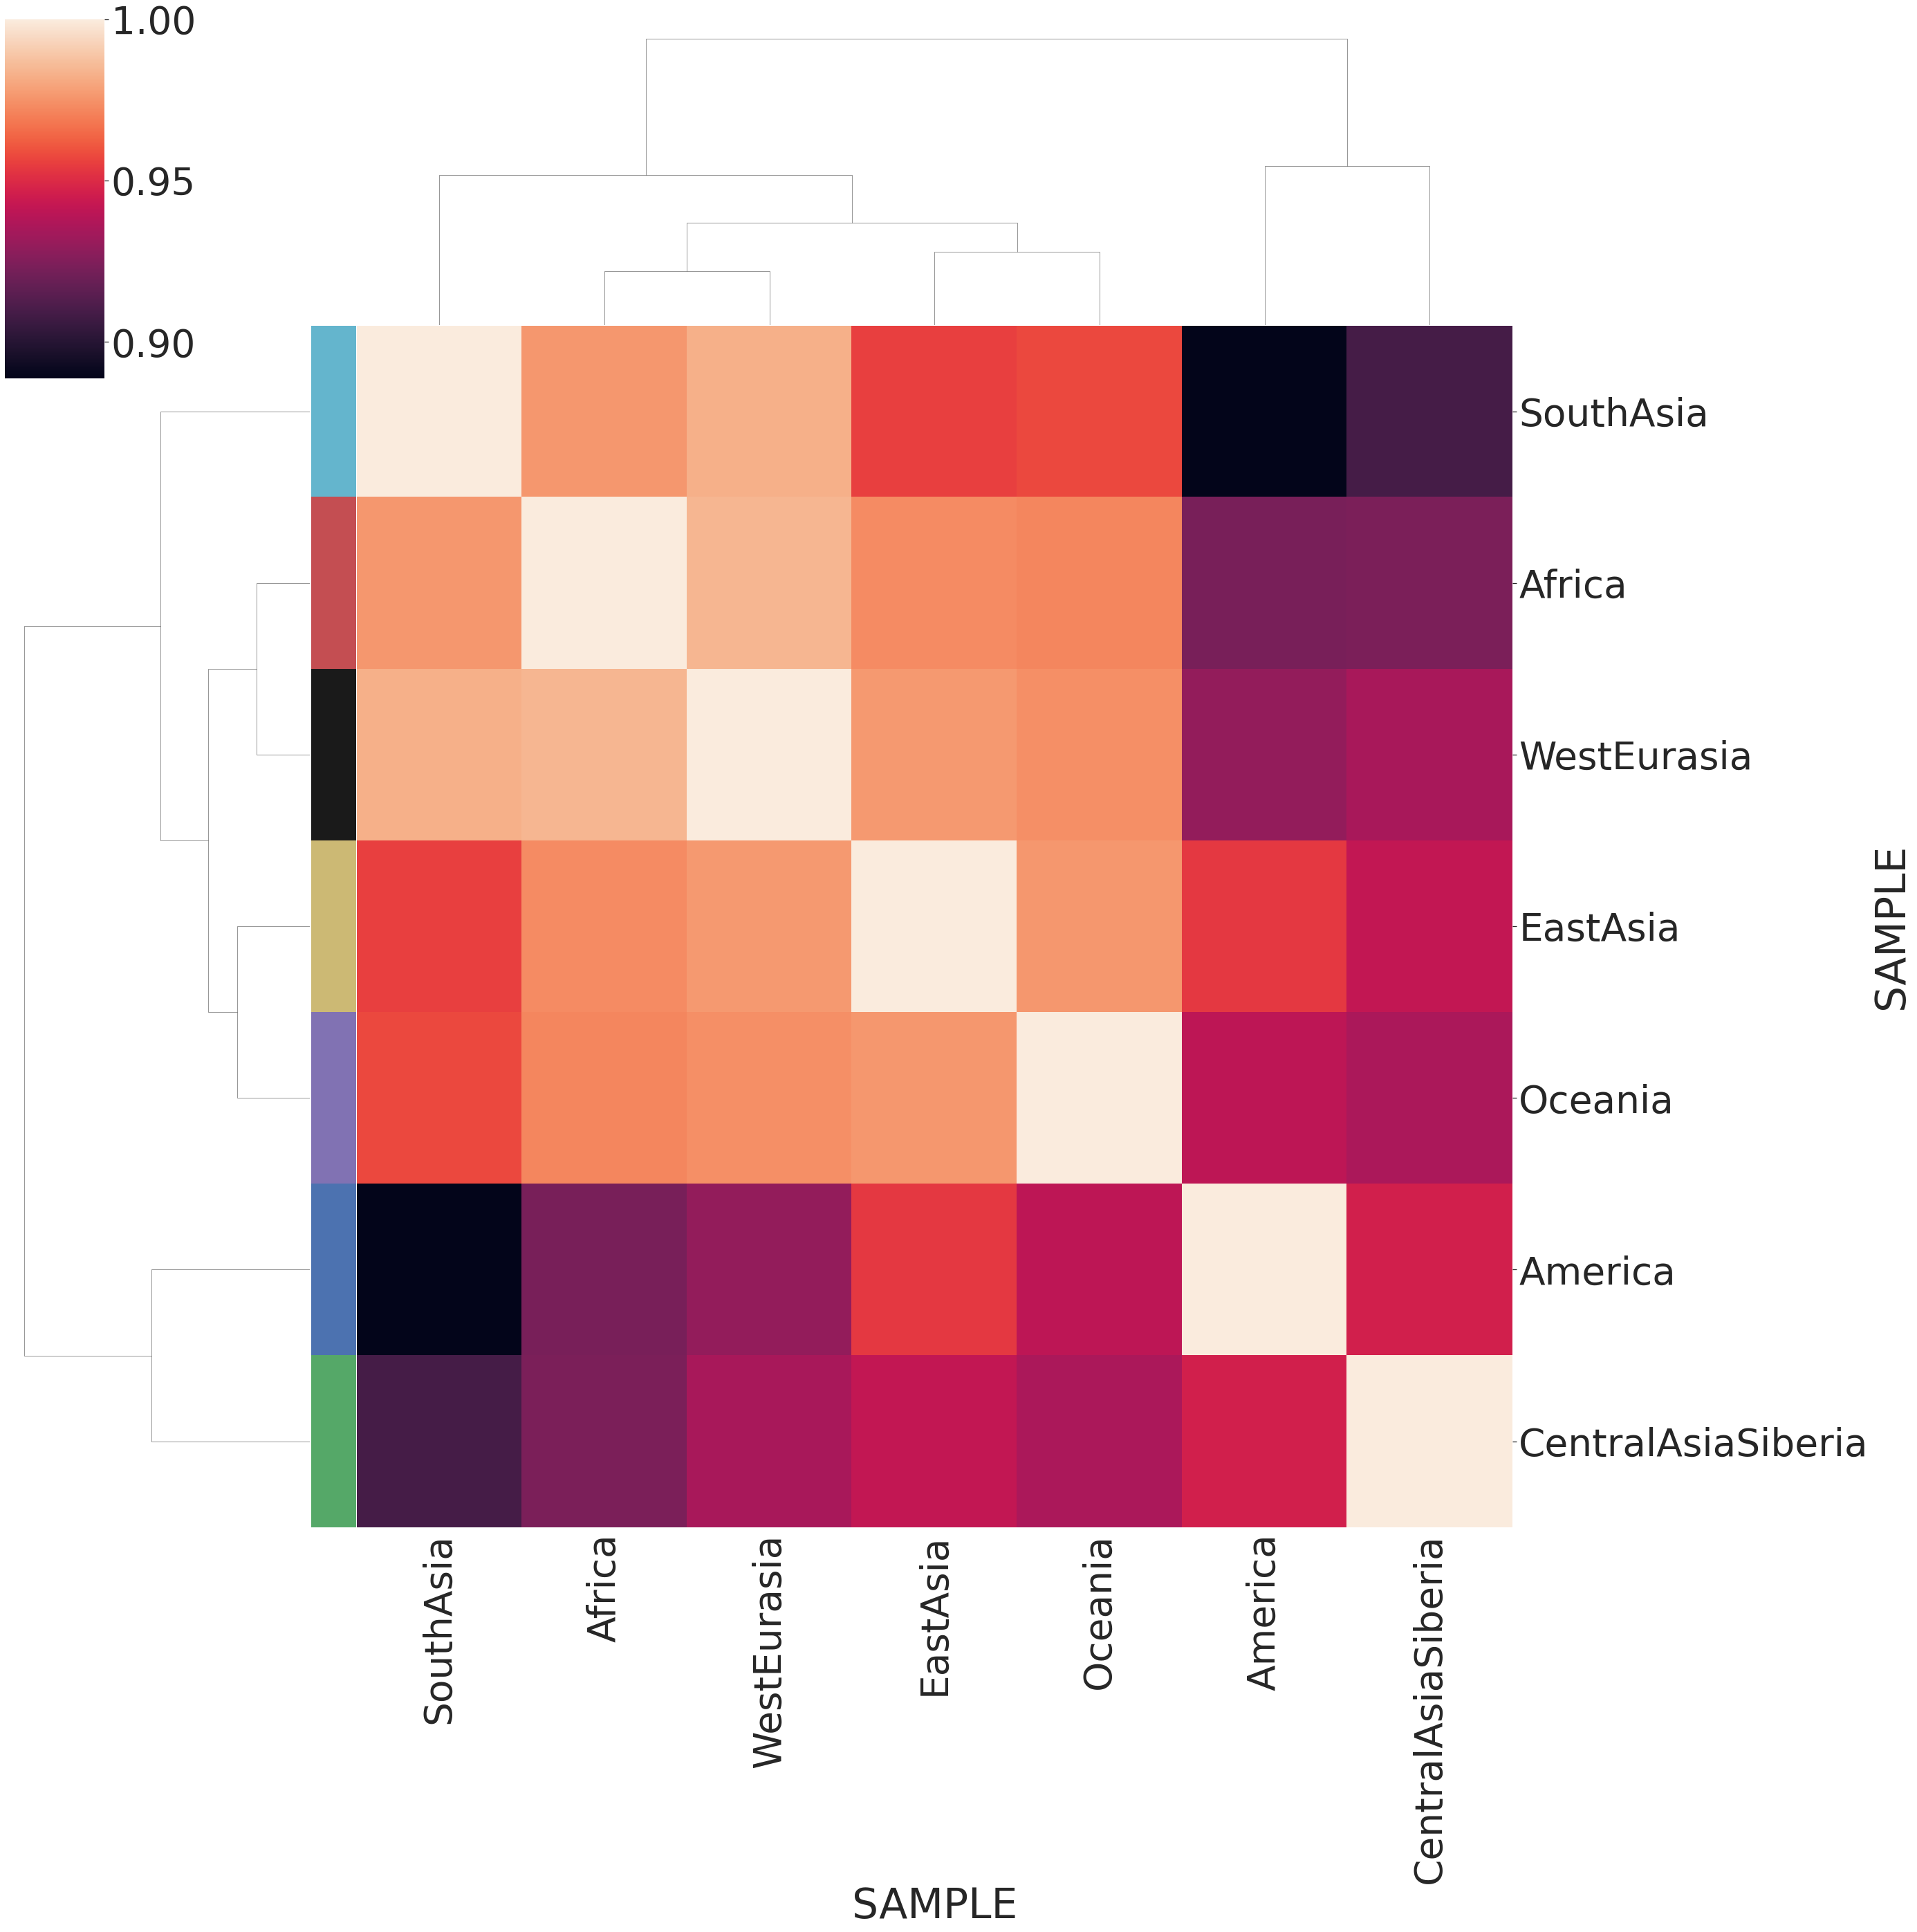

In [194]:
freq = final_cnv.iloc[:,3:283]
freq_input = freq.rename(columns=features['REGION'])
df = freq_input.T
#df = df.reset_index()

#df.groupby('SAMPLE').count().div(df.groupby('SAMPLE').size(),0)


df = df.notnull().groupby(level=0).mean()

df = df.T

lut = dict(zip(df.columns.unique(), "rbgymck"))
lut

seaborn.set(font_scale=5)
corrmatrix = df.corr(method='pearson')
row_colors = df.columns.map(lut)
seaborn.clustermap(corrmatrix, row_colors=row_colors, row_cluster=True, figsize=(40,40))
#plt.savefig('clustermap_regions.pdf')

In [79]:
feature_table = pd.read_table('/branchinecta/jbazanwilliamson/GCF_009914755.1_T2T-CHM13v2.0_feature_table.txt')#, index_col='chromosome')
report = pd.read_table('/branchinecta/jbazanwilliamson/GCF_009914755.1_T2T-CHM13v2.0_assembly_report.txt')

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [82]:
chm13_gene_anotation = feature_table.merge(report, left_on='genomic_accession', right_on='RefSeq-Accn')
chm13_gene_anotation[chm13_gene_anotation['class'] == 'protein_coding']
chm13_gene_anotation


# feature                   class         assembly     assembly_unit  \
0           gene          protein_coding  GCF_009914755.1  Primary Assembly   
1           mRNA                     NaN  GCF_009914755.1  Primary Assembly   
2            CDS            with_protein  GCF_009914755.1  Primary Assembly   
3           gene                  lncRNA  GCF_009914755.1  Primary Assembly   
4          ncRNA                  lncRNA  GCF_009914755.1  Primary Assembly   
...          ...                     ...              ...               ...   
236307      gene          protein_coding  GCF_009914755.1  Primary Assembly   
236308      mRNA                     NaN  GCF_009914755.1  Primary Assembly   
236309       CDS            with_protein  GCF_009914755.1  Primary Assembly   
236310      gene  transcribed_pseudogene  GCF_009914755.1  Primary Assembly   
236311  misc_RNA                     NaN  GCF_009914755.1  Primary Assembly   

          seq_type chromosome genomic_accession     start       end strand  \
0       chromosome          1       NC_060925.1     11134     37628      -   
1       chromosome          1       NC_060925.1     11134     37628      -   
2       chromosome          1       NC_060925.1     13463     37628      -   
3       chromosome          1       NC_060925.1     20892     23710      -   
4       chromosome          1       NC_060925.1     20892     23710      -   
...            ...        ...               ...       ...       ...    ...   
236307  chromosome          Y       NC_060948.1  62446549  62449392      +   
236308  chromosome          Y       NC_060948.1  62446549  62449392      +   
236309  chromosome          Y       NC_060948.1  62446549  62449100      +   
236310  chromosome          Y       NC_060948.1  62449384  62451910      -   
236311  chromosome          Y       NC_060948.1  62449384  62451910      -   

        ... Sequence-Name       Sequence-Role Assigned-Molecule  \
0       ...             1  assembled-molecule                 1   
1       ...             1  assembled-molecule                 1   
2       ...             1  assembled-molecule                 1   
3       ...             1  assembled-molecule                 1   
4       ...             1  assembled-molecule                 1   
...     ...           ...                 ...               ...   
236307  ...             Y  assembled-molecule                 Y   
236308  ...             Y  assembled-molecule                 Y   
236309  ...             Y  assembled-molecule                 Y   
236310  ...             Y  assembled-molecule                 Y   
236311  ...             Y  assembled-molecule                 Y   

       Assigned-Molecule-Location/Type GenBank-Accn  Relationship  \
0                           Chromosome   CP068277.2             =   
1                           Chromosome   CP068277.2             =   
2                           Chromosome   CP068277.2             =   
3                           Chromosome   CP068277.2             =   
4                           Chromosome   CP068277.2             =   
...                                ...          ...           ...   
236307                      Chromosome   CP086569.2             =   
236308                      Chromosome   CP086569.2             =   
236309                      Chromosome   CP086569.2             =   
236310                      Chromosome   CP086569.2             =   
236311                      Chromosome   CP086569.2             =   

        RefSeq-Accn     Assembly-Unit  Sequence-Length UCSC-style-name  
0       NC_060925.1  Primary Assembly        248387328              na  
1       NC_060925.1  Primary Assembly        248387328              na  
2       NC_060925.1  Primary Assembly        248387328              na  
3       NC_060925.1  Primary Assembly        248387328              na  
4       NC_060925.1  Primary Assembly        248387328              na  
...             ...               ...            

# feature           class         assembly     assembly_unit  \
0           gene  protein_coding  GCF_009914755.1  Primary Assembly   
7           gene  protein_coding  GCF_009914755.1  Primary Assembly   
42          gene  protein_coding  GCF_009914755.1  Primary Assembly   
49          gene  protein_coding  GCF_009914755.1  Primary Assembly   
52          gene  protein_coding  GCF_009914755.1  Primary Assembly   
...          ...             ...              ...               ...   
232256      gene  protein_coding  GCF_009914755.1  Primary Assembly   
236280      gene  protein_coding  GCF_009914755.1  Primary Assembly   
236288      gene  protein_coding  GCF_009914755.1  Primary Assembly   
236300      gene  protein_coding  GCF_009914755.1  Primary Assembly   
236307      gene  protein_coding  GCF_009914755.1  Primary Assembly   

          seq_type chromosome genomic_accession     start       end strand  \
0       chromosome          1       NC_060925.1     11134     37628      -   
7       chromosome          1       NC_060925.1    111940    112877      -   
42      chromosome          1       NC_060925.1    353566    373316      +   
49      chromosome          1       NC_060925.1    372945    388041      -   
52      chromosome          1       NC_060925.1    389374    394430      +   
...            ...        ...               ...       ...       ...    ...   
232256  chromosome          Y       NC_060948.1  36480752  36497801      +   
236280  chromosome          Y       NC_060948.1  62190003  62204700      +   
236288  chromosome          Y       NC_060948.1  62306325  62368760      +   
236300  chromosome          Y       NC_060948.1  62422687  62435805      +   
236307  chromosome          Y       NC_060948.1  62446549  62449392      +   

        ... Sequence-Name       Sequence-Role Assigned-Molecule  \
0       ...             1  assembled-molecule                 1   
7       ...             1  assembled-molecule                 1   
42      ...             1  assembled-molecule                 1   
49      ...             1  assembled-molecule                 1   
52      ...             1  assembled-molecule                 1   
...     ...           ...                 ...               ...   
232256  ...             Y  assembled-molecule                 Y   
236280  ...             Y  assembled-molecule                 Y   
236288  ...             Y  assembled-molecule                 Y   
236300  ...             Y  assembled-molecule                 Y   
236307  ...             Y  assembled-molecule                 Y   

       Assigned-Molecule-Location/Type GenBank-Accn  Relationship  \
0                           Chromosome   CP068277.2             =   
7                           Chromosome   CP068277.2             =   
42                          Chromosome   CP068277.2             =   
49                          Chromosome   CP068277.2             =   
52                          Chromosome   CP068277.2             =   
...                                ...          ...           ...   
232256                      Chromosome   CP086569.2             =   
236280                      Chromosome   CP086569.2             =   
236288                      Chromosome   CP086569.2             =   
236300                      Chromosome   CP086569.2             =   
236307                      Chromosome   CP086569.2             =   

        RefSeq-Accn     Assembly-Unit  Sequence-Length UCSC-style-name  
0       NC_060925.1  Primary Assembly        248387328              na  
7       NC_060925.1  Primary Assembly        248387328              na  
42      NC_060925.1  Primary Assembly        248387328              na  
49      NC_060925.1  Primary Assembly        248387328              na  
52      NC_060925.1  Primary Assembly        248387328              na  
...             ...               ...              ...             ...  
232256  NC_060948.1  Primary Assembly         62460029              na  

In [59]:
new

# feature                   class         assembly  \
chromosome                                                      
1               gene          protein_coding  GCF_009914755.1   
1               mRNA                     NaN  GCF_009914755.1   
1                CDS            with_protein  GCF_009914755.1   
1               gene                  lncRNA  GCF_009914755.1   
1              ncRNA                  lncRNA  GCF_009914755.1   
...              ...                     ...              ...   
Y               gene          protein_coding  GCF_009914755.1   
Y               mRNA                     NaN  GCF_009914755.1   
Y                CDS            with_protein  GCF_009914755.1   
Y               gene  transcribed_pseudogene  GCF_009914755.1   
Y           misc_RNA                     NaN  GCF_009914755.1   

               assembly_unit    seq_type genomic_accession     start  \
chromosome                                                             
1           Primary Assembly  chromosome       NC_060925.1     11134   
1           Primary Assembly  chromosome       NC_060925.1     11134   
1           Primary Assembly  chromosome       NC_060925.1     13463   
1           Primary Assembly  chromosome       NC_060925.1     20892   
1           Primary Assembly  chromosome       NC_060925.1     20892   
...                      ...         ...               ...       ...   
Y           Primary Assembly  chromosome       NC_060948.1  62446549   
Y           Primary Assembly  chromosome       NC_060948.1  62446549   
Y           Primary Assembly  chromosome       NC_060948.1  62446549   
Y           Primary Assembly  chromosome       NC_060948.1  62449384   
Y           Primary Assembly  chromosome       NC_060948.1  62449384   

                 end strand product_accession  non-redundant_refseq  \
chromosome                                                            
1              37628      -               NaN                   NaN   
1              37628      -    XM_047443605.1                   NaN   
1              37628      -    XP_047299561.1                   NaN   
1              23710      -               NaN                   NaN   
1              23710      -    XR_007069731.1                   NaN   
...              ...    ...               ...                   ...   
Y           62449392      +               NaN                   NaN   
Y           62449392      +    XM_047447183.1                   NaN   
Y           62449100      +    XP_047303139.1                   NaN   
Y           62451910      -               NaN                   NaN   
Y           62451910      -       NR_110561.1                   NaN   

           related_accession  \
chromosome                     
1                        NaN   
1             XP_047299561.1   
1             XM_047443605.1   
1                        NaN   
1                        NaN   
...                      ...   
Y                        NaN   
Y             XP_047303139.1   
Y             XM_047447183.1   
Y                        NaN   
Y                        NaN   

                                                         name        symbol  \
chromosome                                                                    
1                                                         NaN  LOC105378947   
1           proline-rich extensin-like protein EPR1, trans...  LOC105378947   
1             uncharacterized protein LOC105378947 isoform X2  LOC105378947   
1                                                         NaN  LOC124905685   
1                                uncharacterized LOC124905685  LOC124905685   
...                                                       ...           ...   
Y                                                         NaN  LOC124908905   
Y                           WAS protein family homolog 6-like  LOC124908905   
Y                           WAS protein family homolog 6-like  LOC124908905   
Y                 